In [1]:
import os

import torch

from MResNet import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

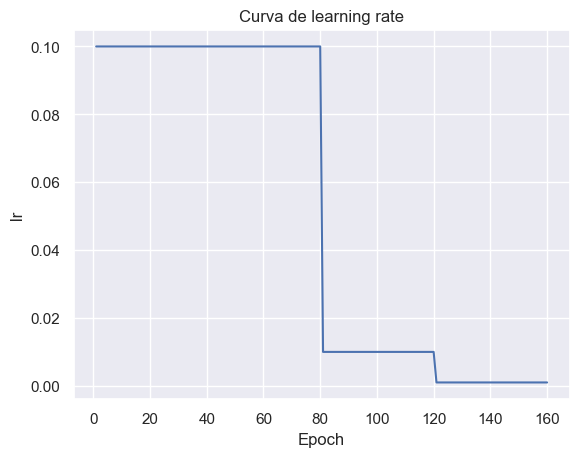

In [2]:
xs = [*range(1,161)]
ys = [lr_control({80: 0.1, 120: 0.01, 160: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-20

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [5]:
net = MResNet(BasicBlock, [3,3,3], num_classes=10, stochastic_depth=False)
net.cuda()
model_name = "MResNet20"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,097                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:12, 32.29it/s]

Epoch 1 finished, average loss: 0.0115981759
Starting testing


Correct: 5695, total: 10000, accuracy: 0.5694999695, average loss: 0.0093617963


391it [00:12, 31.45it/s]

Epoch 2 finished, average loss: 0.0075338493
Starting testing


Correct: 6885, total: 10000, accuracy: 0.6884999871, average loss: 0.0070225445


391it [00:12, 32.00it/s]

Epoch 3 finished, average loss: 0.0061410662
Starting testing


Correct: 7208, total: 10000, accuracy: 0.7207999825, average loss: 0.0064700619


391it [00:12, 31.46it/s]

Epoch 4 finished, average loss: 0.0052827857
Starting testing


Correct: 7563, total: 10000, accuracy: 0.7562999725, average loss: 0.0055720743


391it [00:12, 32.08it/s]

Epoch 5 finished, average loss: 0.0047887682
Starting testing


Correct: 7882, total: 10000, accuracy: 0.7881999612, average loss: 0.0049207995


391it [00:12, 31.51it/s]

Epoch 6 finished, average loss: 0.0043711540
Starting testing


Correct: 7805, total: 10000, accuracy: 0.7804999948, average loss: 0.0050552014


391it [00:12, 32.25it/s]

Epoch 7 finished, average loss: 0.0040443206
Starting testing


Correct: 7557, total: 10000, accuracy: 0.7556999922, average loss: 0.0057696877


391it [00:12, 32.23it/s]

Epoch 8 finished, average loss: 0.0038523041
Starting testing


Correct: 8065, total: 10000, accuracy: 0.8064999580, average loss: 0.0045395949


391it [00:12, 32.07it/s]

Epoch 9 finished, average loss: 0.0036239146
Starting testing


Correct: 8185, total: 10000, accuracy: 0.8184999824, average loss: 0.0042230160


391it [00:12, 32.26it/s]

Epoch 10 finished, average loss: 0.0034662764
Starting testing


Correct: 8129, total: 10000, accuracy: 0.8129000068, average loss: 0.0044240224


391it [00:12, 31.84it/s]

Epoch 11 finished, average loss: 0.0033467867
Starting testing


Correct: 8232, total: 10000, accuracy: 0.8231999874, average loss: 0.0041422748


391it [00:12, 32.27it/s]

Epoch 12 finished, average loss: 0.0032076110
Starting testing


Correct: 8420, total: 10000, accuracy: 0.8420000076, average loss: 0.0036413027


391it [00:12, 31.90it/s]

Epoch 13 finished, average loss: 0.0030850608
Starting testing


Correct: 8414, total: 10000, accuracy: 0.8413999677, average loss: 0.0037367795


391it [00:12, 32.30it/s]

Epoch 14 finished, average loss: 0.0030389153
Starting testing


Correct: 8347, total: 10000, accuracy: 0.8346999884, average loss: 0.0038511659


391it [00:12, 32.21it/s]

Epoch 15 finished, average loss: 0.0029064360
Starting testing


Correct: 7842, total: 10000, accuracy: 0.7841999531, average loss: 0.0051547611


391it [00:12, 31.89it/s]

Epoch 16 finished, average loss: 0.0028829068
Starting testing


Correct: 8258, total: 10000, accuracy: 0.8258000016, average loss: 0.0039156807


391it [00:12, 31.77it/s]

Epoch 17 finished, average loss: 0.0027893544
Starting testing


Correct: 8346, total: 10000, accuracy: 0.8345999718, average loss: 0.0039317498


391it [00:12, 32.08it/s]

Epoch 18 finished, average loss: 0.0027166321
Starting testing


Correct: 8430, total: 10000, accuracy: 0.8429999948, average loss: 0.0036876303


391it [00:12, 32.22it/s]

Epoch 19 finished, average loss: 0.0026977099
Starting testing


Correct: 8299, total: 10000, accuracy: 0.8298999667, average loss: 0.0040332944


391it [00:12, 32.09it/s]

Epoch 20 finished, average loss: 0.0026003518
Starting testing


Correct: 8595, total: 10000, accuracy: 0.8594999909, average loss: 0.0033313119


391it [00:12, 32.24it/s]

Epoch 21 finished, average loss: 0.0025619426
Starting testing


Correct: 8526, total: 10000, accuracy: 0.8525999784, average loss: 0.0035204119


391it [00:12, 32.31it/s]

Epoch 22 finished, average loss: 0.0024918670
Starting testing


Correct: 8537, total: 10000, accuracy: 0.8536999822, average loss: 0.0034817089


391it [00:12, 31.77it/s]

Epoch 23 finished, average loss: 0.0024501362
Starting testing


Correct: 8579, total: 10000, accuracy: 0.8578999639, average loss: 0.0033222562


391it [00:12, 32.33it/s]

Epoch 24 finished, average loss: 0.0024195214
Starting testing


Correct: 8481, total: 10000, accuracy: 0.8481000066, average loss: 0.0035729010


391it [00:12, 32.21it/s]

Epoch 25 finished, average loss: 0.0023786475
Starting testing


Correct: 8479, total: 10000, accuracy: 0.8478999734, average loss: 0.0037392989


391it [00:12, 32.22it/s]

Epoch 26 finished, average loss: 0.0023596538
Starting testing


Correct: 8325, total: 10000, accuracy: 0.8324999809, average loss: 0.0043435333


391it [00:12, 32.27it/s]

Epoch 27 finished, average loss: 0.0023141627
Starting testing


Correct: 8595, total: 10000, accuracy: 0.8594999909, average loss: 0.0033011677


391it [00:12, 31.90it/s]

Epoch 28 finished, average loss: 0.0022983596
Starting testing


Correct: 8560, total: 10000, accuracy: 0.8560000062, average loss: 0.0036582482


391it [00:12, 32.17it/s]

Epoch 29 finished, average loss: 0.0022600395
Starting testing


Correct: 8682, total: 10000, accuracy: 0.8682000041, average loss: 0.0031893974


391it [00:12, 31.83it/s]

Epoch 30 finished, average loss: 0.0022030218
Starting testing


Correct: 8471, total: 10000, accuracy: 0.8470999599, average loss: 0.0038051392


391it [00:12, 32.14it/s]

Epoch 31 finished, average loss: 0.0021848630
Starting testing


Correct: 8424, total: 10000, accuracy: 0.8423999548, average loss: 0.0037486620


391it [00:12, 32.35it/s]

Epoch 32 finished, average loss: 0.0021613033
Starting testing


Correct: 8579, total: 10000, accuracy: 0.8578999639, average loss: 0.0033510036


391it [00:12, 32.00it/s]

Epoch 33 finished, average loss: 0.0021457772
Starting testing


Correct: 8531, total: 10000, accuracy: 0.8531000018, average loss: 0.0037147726


391it [00:12, 32.21it/s]

Epoch 34 finished, average loss: 0.0021214488
Starting testing


Correct: 8510, total: 10000, accuracy: 0.8509999514, average loss: 0.0035919835


391it [00:12, 31.40it/s]


Epoch 35 finished, average loss: 0.0020943636
Starting testing
Correct: 8539, total: 10000, accuracy: 0.8538999557, average loss: 0.0036774681


391it [00:12, 32.17it/s]

Epoch 36 finished, average loss: 0.0020441651
Starting testing


Correct: 8532, total: 10000, accuracy: 0.8531999588, average loss: 0.0036015296


391it [00:12, 32.07it/s]

Epoch 37 finished, average loss: 0.0020889922
Starting testing


Correct: 8627, total: 10000, accuracy: 0.8626999855, average loss: 0.0034169399


391it [00:12, 32.41it/s]

Epoch 38 finished, average loss: 0.0020170930
Starting testing


Correct: 8661, total: 10000, accuracy: 0.8660999537, average loss: 0.0032547334


391it [00:12, 32.07it/s]

Epoch 39 finished, average loss: 0.0020308514
Starting testing


Correct: 8511, total: 10000, accuracy: 0.8510999680, average loss: 0.0038136204


391it [00:12, 32.30it/s]

Epoch 40 finished, average loss: 0.0020121751
Starting testing


Correct: 8634, total: 10000, accuracy: 0.8633999825, average loss: 0.0034432573


391it [00:12, 32.10it/s]

Epoch 41 finished, average loss: 0.0019678812
Starting testing


Correct: 8588, total: 10000, accuracy: 0.8587999940, average loss: 0.0034099939


391it [00:12, 32.13it/s]

Epoch 42 finished, average loss: 0.0019295654
Starting testing


Correct: 8346, total: 10000, accuracy: 0.8345999718, average loss: 0.0040648131


391it [00:12, 32.06it/s]

Epoch 43 finished, average loss: 0.0019168461
Starting testing


Correct: 8544, total: 10000, accuracy: 0.8543999791, average loss: 0.0034796411


391it [00:12, 31.89it/s]

Epoch 44 finished, average loss: 0.0018985891
Starting testing


Correct: 8687, total: 10000, accuracy: 0.8686999679, average loss: 0.0031950054


391it [00:12, 32.25it/s]

Epoch 45 finished, average loss: 0.0018898748
Starting testing


Correct: 8473, total: 10000, accuracy: 0.8472999930, average loss: 0.0037484486


391it [00:12, 31.94it/s]

Epoch 46 finished, average loss: 0.0019165887
Starting testing


Correct: 8606, total: 10000, accuracy: 0.8605999947, average loss: 0.0033957828


391it [00:12, 32.08it/s]

Epoch 47 finished, average loss: 0.0018572074
Starting testing


Correct: 8639, total: 10000, accuracy: 0.8639000058, average loss: 0.0033912817


391it [00:12, 32.12it/s]

Epoch 48 finished, average loss: 0.0018581455
Starting testing


Correct: 8712, total: 10000, accuracy: 0.8711999655, average loss: 0.0030288968


391it [00:12, 32.10it/s]

Epoch 49 finished, average loss: 0.0018468074
Starting testing


Correct: 8151, total: 10000, accuracy: 0.8150999546, average loss: 0.0049197007


391it [00:12, 32.00it/s]

Epoch 50 finished, average loss: 0.0018526281
Starting testing


Correct: 8580, total: 10000, accuracy: 0.8579999804, average loss: 0.0036188001


391it [00:12, 32.20it/s]

Epoch 51 finished, average loss: 0.0018749018
Starting testing


Correct: 8689, total: 10000, accuracy: 0.8689000010, average loss: 0.0031785064


391it [00:12, 32.12it/s]

Epoch 52 finished, average loss: 0.0018167099
Starting testing


Correct: 8445, total: 10000, accuracy: 0.8445000052, average loss: 0.0039249013


391it [00:12, 32.06it/s]

Epoch 53 finished, average loss: 0.0018201575
Starting testing


Correct: 8770, total: 10000, accuracy: 0.8769999743, average loss: 0.0029216469


391it [00:12, 32.18it/s]

Epoch 54 finished, average loss: 0.0018081277
Starting testing


Correct: 8492, total: 10000, accuracy: 0.8491999507, average loss: 0.0037867671


391it [00:12, 32.02it/s]

Epoch 55 finished, average loss: 0.0017724754
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0032009706


391it [00:12, 31.96it/s]

Epoch 56 finished, average loss: 0.0017630659
Starting testing


Correct: 8632, total: 10000, accuracy: 0.8631999493, average loss: 0.0034419319


391it [00:12, 31.54it/s]

Epoch 57 finished, average loss: 0.0017704259
Starting testing


Correct: 8661, total: 10000, accuracy: 0.8660999537, average loss: 0.0032530157


391it [00:12, 32.00it/s]


Epoch 58 finished, average loss: 0.0018119156
Starting testing
Correct: 8744, total: 10000, accuracy: 0.8743999600, average loss: 0.0030585422


391it [00:12, 31.98it/s]

Epoch 59 finished, average loss: 0.0017359071
Starting testing


Correct: 8496, total: 10000, accuracy: 0.8495999575, average loss: 0.0038680121


391it [00:12, 32.04it/s]

Epoch 60 finished, average loss: 0.0017286864
Starting testing


Correct: 8742, total: 10000, accuracy: 0.8741999865, average loss: 0.0029595991


391it [00:12, 32.05it/s]

Epoch 61 finished, average loss: 0.0017146983
Starting testing


Correct: 8772, total: 10000, accuracy: 0.8772000074, average loss: 0.0030576099


391it [00:12, 32.26it/s]

Epoch 62 finished, average loss: 0.0017182504
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0032525059


391it [00:12, 32.14it/s]

Epoch 63 finished, average loss: 0.0017208230
Starting testing


Correct: 8743, total: 10000, accuracy: 0.8743000031, average loss: 0.0031085611


391it [00:12, 32.33it/s]

Epoch 64 finished, average loss: 0.0017274801
Starting testing


Correct: 8700, total: 10000, accuracy: 0.8700000048, average loss: 0.0031002129


391it [00:12, 32.18it/s]

Epoch 65 finished, average loss: 0.0017168813
Starting testing


Correct: 8750, total: 10000, accuracy: 0.8750000000, average loss: 0.0030646633


391it [00:12, 32.40it/s]

Epoch 66 finished, average loss: 0.0016953468
Starting testing


Correct: 8617, total: 10000, accuracy: 0.8616999984, average loss: 0.0036325378


391it [00:12, 32.28it/s]

Epoch 67 finished, average loss: 0.0016992396
Starting testing


Correct: 8690, total: 10000, accuracy: 0.8689999580, average loss: 0.0032110395


391it [00:12, 32.17it/s]

Epoch 68 finished, average loss: 0.0016708771
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0027585349


391it [00:12, 32.30it/s]

Epoch 69 finished, average loss: 0.0016477346
Starting testing


Correct: 8739, total: 10000, accuracy: 0.8738999963, average loss: 0.0031111130


391it [00:12, 31.95it/s]

Epoch 70 finished, average loss: 0.0016414975
Starting testing


Correct: 8588, total: 10000, accuracy: 0.8587999940, average loss: 0.0035147046


391it [00:12, 32.09it/s]

Epoch 71 finished, average loss: 0.0016543347
Starting testing


Correct: 8699, total: 10000, accuracy: 0.8698999882, average loss: 0.0032351750


391it [00:12, 31.94it/s]

Epoch 72 finished, average loss: 0.0016460038
Starting testing


Correct: 8668, total: 10000, accuracy: 0.8667999506, average loss: 0.0031255036


391it [00:12, 32.10it/s]

Epoch 73 finished, average loss: 0.0016158579
Starting testing


Correct: 8800, total: 10000, accuracy: 0.8799999952, average loss: 0.0029922691


391it [00:12, 32.33it/s]

Epoch 74 finished, average loss: 0.0016369324
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0028335254


391it [00:12, 32.11it/s]

Epoch 75 finished, average loss: 0.0015976997
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0029461499


391it [00:12, 32.15it/s]

Epoch 76 finished, average loss: 0.0016556282
Starting testing


Correct: 8721, total: 10000, accuracy: 0.8720999956, average loss: 0.0030887326


391it [00:12, 32.03it/s]

Epoch 77 finished, average loss: 0.0016065462
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0032248909


391it [00:12, 32.31it/s]

Epoch 78 finished, average loss: 0.0016187543
Starting testing


Correct: 8590, total: 10000, accuracy: 0.8589999676, average loss: 0.0035933973


391it [00:12, 32.25it/s]

Epoch 79 finished, average loss: 0.0016169194
Starting testing


Correct: 8629, total: 10000, accuracy: 0.8628999591, average loss: 0.0034388207


391it [00:12, 32.14it/s]

Epoch 80 finished, average loss: 0.0016258440
Starting testing


Correct: 8652, total: 10000, accuracy: 0.8651999831, average loss: 0.0033175547


391it [00:12, 31.94it/s]

Epoch 81 finished, average loss: 0.0010169794
Starting testing


Correct: 9145, total: 10000, accuracy: 0.9144999981, average loss: 0.0020897826


391it [00:12, 32.08it/s]

Epoch 82 finished, average loss: 0.0007784421
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0020812649


391it [00:12, 32.12it/s]

Epoch 83 finished, average loss: 0.0006930237
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0020641661


391it [00:12, 31.65it/s]

Epoch 84 finished, average loss: 0.0006408866
Starting testing


Correct: 9173, total: 10000, accuracy: 0.9172999859, average loss: 0.0020901736


391it [00:12, 32.25it/s]

Epoch 85 finished, average loss: 0.0005980040
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0020985625


391it [00:12, 32.00it/s]

Epoch 86 finished, average loss: 0.0005660575
Starting testing


Correct: 9167, total: 10000, accuracy: 0.9167000055, average loss: 0.0021069159


391it [00:12, 32.13it/s]

Epoch 87 finished, average loss: 0.0005363996
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0021173544


391it [00:12, 31.98it/s]

Epoch 88 finished, average loss: 0.0005092712
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0021437986


391it [00:12, 32.02it/s]

Epoch 89 finished, average loss: 0.0004963363
Starting testing


Correct: 9174, total: 10000, accuracy: 0.9174000025, average loss: 0.0021791794


391it [00:12, 32.08it/s]

Epoch 90 finished, average loss: 0.0004514743
Starting testing


Correct: 9169, total: 10000, accuracy: 0.9168999791, average loss: 0.0022131207


391it [00:12, 31.98it/s]

Epoch 91 finished, average loss: 0.0004577551
Starting testing


Correct: 9156, total: 10000, accuracy: 0.9156000018, average loss: 0.0022449614


391it [00:12, 32.28it/s]

Epoch 92 finished, average loss: 0.0004407782
Starting testing


Correct: 9183, total: 10000, accuracy: 0.9182999730, average loss: 0.0022371384


391it [00:12, 32.07it/s]

Epoch 93 finished, average loss: 0.0004134782
Starting testing


Correct: 9175, total: 10000, accuracy: 0.9174999595, average loss: 0.0022439925


391it [00:12, 32.08it/s]

Epoch 94 finished, average loss: 0.0004192144
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0022768712


391it [00:12, 32.01it/s]

Epoch 95 finished, average loss: 0.0003981371
Starting testing


Correct: 9183, total: 10000, accuracy: 0.9182999730, average loss: 0.0022334686


391it [00:12, 32.02it/s]

Epoch 96 finished, average loss: 0.0003634061
Starting testing


Correct: 9182, total: 10000, accuracy: 0.9181999564, average loss: 0.0022839825


391it [00:12, 32.06it/s]

Epoch 97 finished, average loss: 0.0003727975
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0023501494


391it [00:12, 32.36it/s]

Epoch 98 finished, average loss: 0.0003571308
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0023806663


391it [00:12, 32.38it/s]

Epoch 99 finished, average loss: 0.0003458766
Starting testing


Correct: 9192, total: 10000, accuracy: 0.9192000031, average loss: 0.0024001781


391it [00:12, 32.26it/s]

Epoch 100 finished, average loss: 0.0003392474
Starting testing


Correct: 9153, total: 10000, accuracy: 0.9152999520, average loss: 0.0024034532


391it [00:12, 32.31it/s]

Epoch 101 finished, average loss: 0.0003086935
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0024147148


391it [00:12, 32.35it/s]

Epoch 102 finished, average loss: 0.0003223911
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0024314427


391it [00:12, 32.23it/s]

Epoch 103 finished, average loss: 0.0003129813
Starting testing


Correct: 9175, total: 10000, accuracy: 0.9174999595, average loss: 0.0024578174


391it [00:12, 31.71it/s]

Epoch 104 finished, average loss: 0.0003031861
Starting testing


Correct: 9137, total: 10000, accuracy: 0.9136999846, average loss: 0.0024816881


391it [00:12, 32.02it/s]

Epoch 105 finished, average loss: 0.0002953684
Starting testing


Correct: 9153, total: 10000, accuracy: 0.9152999520, average loss: 0.0024865016


391it [00:12, 31.76it/s]

Epoch 106 finished, average loss: 0.0002863755
Starting testing


Correct: 9145, total: 10000, accuracy: 0.9144999981, average loss: 0.0025712718


391it [00:12, 31.52it/s]

Epoch 107 finished, average loss: 0.0002791605
Starting testing


Correct: 9153, total: 10000, accuracy: 0.9152999520, average loss: 0.0025445164


391it [00:12, 31.94it/s]

Epoch 108 finished, average loss: 0.0002695101
Starting testing


Correct: 9159, total: 10000, accuracy: 0.9158999920, average loss: 0.0025286462


391it [00:12, 32.06it/s]

Epoch 109 finished, average loss: 0.0002692427
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0025353626


391it [00:12, 32.01it/s]

Epoch 110 finished, average loss: 0.0002579409
Starting testing


Correct: 9163, total: 10000, accuracy: 0.9162999988, average loss: 0.0025493125


391it [00:12, 32.28it/s]

Epoch 111 finished, average loss: 0.0002631574
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0025608577


391it [00:12, 31.71it/s]

Epoch 112 finished, average loss: 0.0002518649
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0026172688


391it [00:12, 31.91it/s]

Epoch 113 finished, average loss: 0.0002539821
Starting testing


Correct: 9158, total: 10000, accuracy: 0.9157999754, average loss: 0.0025572627


391it [00:12, 31.77it/s]

Epoch 114 finished, average loss: 0.0002354423
Starting testing


Correct: 9172, total: 10000, accuracy: 0.9171999693, average loss: 0.0026025566


391it [00:12, 31.75it/s]

Epoch 115 finished, average loss: 0.0002326478
Starting testing


Correct: 9153, total: 10000, accuracy: 0.9152999520, average loss: 0.0026138890


391it [00:12, 32.13it/s]

Epoch 116 finished, average loss: 0.0002274819
Starting testing


Correct: 9159, total: 10000, accuracy: 0.9158999920, average loss: 0.0026405570


391it [00:12, 31.75it/s]

Epoch 117 finished, average loss: 0.0002235402
Starting testing


Correct: 9147, total: 10000, accuracy: 0.9146999717, average loss: 0.0026638654


391it [00:12, 32.05it/s]

Epoch 118 finished, average loss: 0.0002186991
Starting testing


Correct: 9141, total: 10000, accuracy: 0.9140999913, average loss: 0.0026992863


391it [00:12, 32.08it/s]

Epoch 119 finished, average loss: 0.0002265187
Starting testing


Correct: 9139, total: 10000, accuracy: 0.9138999581, average loss: 0.0026363616


391it [00:12, 32.25it/s]

Epoch 120 finished, average loss: 0.0002201420
Starting testing


Correct: 9138, total: 10000, accuracy: 0.9138000011, average loss: 0.0027096920


391it [00:12, 32.30it/s]

Epoch 121 finished, average loss: 0.0001952331
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0026400498


391it [00:12, 32.16it/s]

Epoch 122 finished, average loss: 0.0001848515
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0026450912


391it [00:12, 32.33it/s]

Epoch 123 finished, average loss: 0.0001658911
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0026206441


391it [00:12, 32.16it/s]

Epoch 124 finished, average loss: 0.0001659900
Starting testing


Correct: 9168, total: 10000, accuracy: 0.9167999625, average loss: 0.0026134423


391it [00:12, 31.97it/s]

Epoch 125 finished, average loss: 0.0001613114
Starting testing


Correct: 9159, total: 10000, accuracy: 0.9158999920, average loss: 0.0026059088


391it [00:12, 32.21it/s]

Epoch 126 finished, average loss: 0.0001590885
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0026367520


391it [00:12, 31.96it/s]

Epoch 127 finished, average loss: 0.0001539739
Starting testing


Correct: 9174, total: 10000, accuracy: 0.9174000025, average loss: 0.0026147310


391it [00:12, 32.22it/s]


Epoch 128 finished, average loss: 0.0001437092
Starting testing
Correct: 9181, total: 10000, accuracy: 0.9180999994, average loss: 0.0026138939


391it [00:12, 32.50it/s]

Epoch 129 finished, average loss: 0.0001559595
Starting testing


Correct: 9170, total: 10000, accuracy: 0.9169999957, average loss: 0.0026163974


391it [00:12, 31.88it/s]

Epoch 130 finished, average loss: 0.0001441383
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026428821


391it [00:12, 32.02it/s]

Epoch 131 finished, average loss: 0.0001518535
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0026439788


391it [00:12, 31.80it/s]

Epoch 132 finished, average loss: 0.0001490831
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026387014


391it [00:12, 32.02it/s]

Epoch 133 finished, average loss: 0.0001442135
Starting testing


Correct: 9173, total: 10000, accuracy: 0.9172999859, average loss: 0.0026645014


391it [00:12, 32.15it/s]

Epoch 134 finished, average loss: 0.0001476665
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0026401453


391it [00:12, 32.33it/s]

Epoch 135 finished, average loss: 0.0001529699
Starting testing


Correct: 9175, total: 10000, accuracy: 0.9174999595, average loss: 0.0026229428


391it [00:12, 31.89it/s]

Epoch 136 finished, average loss: 0.0001521009
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0026399341


391it [00:12, 32.16it/s]

Epoch 137 finished, average loss: 0.0001457969
Starting testing


Correct: 9180, total: 10000, accuracy: 0.9179999828, average loss: 0.0026214864


391it [00:12, 31.89it/s]


Epoch 138 finished, average loss: 0.0001459929
Starting testing
Correct: 9172, total: 10000, accuracy: 0.9171999693, average loss: 0.0026314735


391it [00:12, 31.83it/s]

Epoch 139 finished, average loss: 0.0001413329
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0026558924


391it [00:12, 32.04it/s]

Epoch 140 finished, average loss: 0.0001430182
Starting testing


Correct: 9179, total: 10000, accuracy: 0.9178999662, average loss: 0.0026480909


391it [00:12, 32.22it/s]

Epoch 141 finished, average loss: 0.0001404234
Starting testing


Correct: 9168, total: 10000, accuracy: 0.9167999625, average loss: 0.0026693106


391it [00:12, 32.10it/s]

Epoch 142 finished, average loss: 0.0001380411
Starting testing


Correct: 9169, total: 10000, accuracy: 0.9168999791, average loss: 0.0026540930


391it [00:12, 31.89it/s]

Epoch 143 finished, average loss: 0.0001459375
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0026683510


391it [00:12, 32.30it/s]

Epoch 144 finished, average loss: 0.0001328557
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0026598393


391it [00:12, 32.20it/s]

Epoch 145 finished, average loss: 0.0001438193
Starting testing


Correct: 9172, total: 10000, accuracy: 0.9171999693, average loss: 0.0026640493


391it [00:12, 32.14it/s]

Epoch 146 finished, average loss: 0.0001347878
Starting testing


Correct: 9159, total: 10000, accuracy: 0.9158999920, average loss: 0.0026498466


391it [00:12, 32.16it/s]

Epoch 147 finished, average loss: 0.0001345072
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0026628765


391it [00:12, 32.24it/s]

Epoch 148 finished, average loss: 0.0001395105
Starting testing


Correct: 9172, total: 10000, accuracy: 0.9171999693, average loss: 0.0026680631


391it [00:12, 31.95it/s]

Epoch 149 finished, average loss: 0.0001330292
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026746914


391it [00:12, 32.08it/s]

Epoch 150 finished, average loss: 0.0001381796
Starting testing


Correct: 9175, total: 10000, accuracy: 0.9174999595, average loss: 0.0026811163


391it [00:12, 32.24it/s]

Epoch 151 finished, average loss: 0.0001281223
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026837346


391it [00:12, 32.19it/s]

Epoch 152 finished, average loss: 0.0001276116
Starting testing


Correct: 9164, total: 10000, accuracy: 0.9163999557, average loss: 0.0026606077


391it [00:12, 32.21it/s]

Epoch 153 finished, average loss: 0.0001298545
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0026848468


391it [00:12, 31.88it/s]

Epoch 154 finished, average loss: 0.0001320136
Starting testing


Correct: 9168, total: 10000, accuracy: 0.9167999625, average loss: 0.0026643635


391it [00:12, 31.79it/s]

Epoch 155 finished, average loss: 0.0001248760
Starting testing


Correct: 9159, total: 10000, accuracy: 0.9158999920, average loss: 0.0027126999


391it [00:12, 31.93it/s]

Epoch 156 finished, average loss: 0.0001293665
Starting testing


Correct: 9171, total: 10000, accuracy: 0.9170999527, average loss: 0.0026549393


391it [00:12, 31.91it/s]

Epoch 157 finished, average loss: 0.0001296544
Starting testing


Correct: 9173, total: 10000, accuracy: 0.9172999859, average loss: 0.0026936554


391it [00:12, 31.98it/s]

Epoch 158 finished, average loss: 0.0001290630
Starting testing


Correct: 9180, total: 10000, accuracy: 0.9179999828, average loss: 0.0026871713


391it [00:12, 32.08it/s]

Epoch 159 finished, average loss: 0.0001225865
Starting testing


Correct: 9162, total: 10000, accuracy: 0.9161999822, average loss: 0.0026985891


391it [00:12, 32.34it/s]

Epoch 160 finished, average loss: 0.0001293346
Starting testing


Correct: 9166, total: 10000, accuracy: 0.9165999889, average loss: 0.0026800770
CPU times: user 24min 51s, sys: 1min 25s, total: 26min 16s
Wall time: 35min 53s


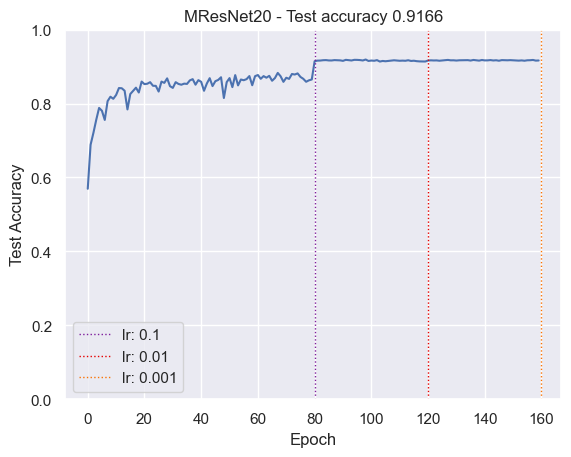

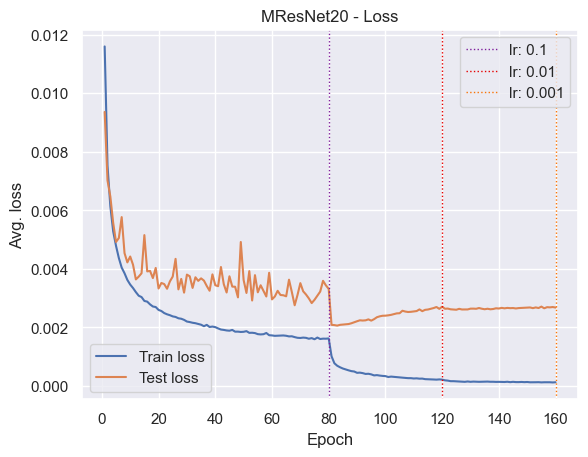

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet20 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 

## LMResNet-32

In [9]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [11]:
net = MResNet(BasicBlock, [5,5,5], num_classes=10, stochastic_depth=False)
net.cuda()
model_name = "MResNet32"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,103                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [12]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:13, 28.26it/s]

Epoch 1 finished, average loss: 0.0119675797
Starting testing


Correct: 5085, total: 10000, accuracy: 0.5084999800, average loss: 0.0111854358


391it [00:13, 28.19it/s]

Epoch 2 finished, average loss: 0.0080604591
Starting testing


Correct: 6370, total: 10000, accuracy: 0.6369999647, average loss: 0.0080169851


391it [00:13, 28.29it/s]

Epoch 3 finished, average loss: 0.0064301914
Starting testing


Correct: 6946, total: 10000, accuracy: 0.6945999861, average loss: 0.0071718058


391it [00:13, 28.18it/s]

Epoch 4 finished, average loss: 0.0054806213
Starting testing


Correct: 7699, total: 10000, accuracy: 0.7698999643, average loss: 0.0052278638


391it [00:13, 28.11it/s]

Epoch 5 finished, average loss: 0.0048768352
Starting testing


Correct: 7900, total: 10000, accuracy: 0.7899999619, average loss: 0.0047884440


391it [00:13, 28.15it/s]


Epoch 6 finished, average loss: 0.0043885349
Starting testing
Correct: 7880, total: 10000, accuracy: 0.7879999876, average loss: 0.0050655799


391it [00:13, 28.12it/s]

Epoch 7 finished, average loss: 0.0040498582
Starting testing


Correct: 7657, total: 10000, accuracy: 0.7656999826, average loss: 0.0056053480


391it [00:13, 28.01it/s]

Epoch 8 finished, average loss: 0.0038076108
Starting testing


Correct: 8146, total: 10000, accuracy: 0.8145999908, average loss: 0.0042678600


391it [00:13, 27.96it/s]

Epoch 9 finished, average loss: 0.0035763982
Starting testing


Correct: 7841, total: 10000, accuracy: 0.7840999961, average loss: 0.0048682432


391it [00:13, 28.17it/s]

Epoch 10 finished, average loss: 0.0034259814
Starting testing


Correct: 8259, total: 10000, accuracy: 0.8258999586, average loss: 0.0042702985


391it [00:13, 28.15it/s]

Epoch 11 finished, average loss: 0.0032506509
Starting testing


Correct: 8121, total: 10000, accuracy: 0.8120999932, average loss: 0.0045620834


391it [00:13, 27.98it/s]

Epoch 12 finished, average loss: 0.0031337799
Starting testing


Correct: 8351, total: 10000, accuracy: 0.8350999951, average loss: 0.0037970155


391it [00:13, 28.12it/s]

Epoch 13 finished, average loss: 0.0030318256
Starting testing


Correct: 8212, total: 10000, accuracy: 0.8211999536, average loss: 0.0040679080


391it [00:13, 28.09it/s]

Epoch 14 finished, average loss: 0.0028773433
Starting testing


Correct: 8325, total: 10000, accuracy: 0.8324999809, average loss: 0.0039595137


391it [00:13, 28.08it/s]


Epoch 15 finished, average loss: 0.0027817115
Starting testing
Correct: 8394, total: 10000, accuracy: 0.8393999934, average loss: 0.0037951502


391it [00:13, 28.19it/s]

Epoch 16 finished, average loss: 0.0027391477
Starting testing


Correct: 8317, total: 10000, accuracy: 0.8316999674, average loss: 0.0040301412


391it [00:13, 28.30it/s]

Epoch 17 finished, average loss: 0.0026458758
Starting testing


Correct: 8500, total: 10000, accuracy: 0.8499999642, average loss: 0.0034924301


391it [00:13, 28.05it/s]

Epoch 18 finished, average loss: 0.0025777661
Starting testing


Correct: 8353, total: 10000, accuracy: 0.8352999687, average loss: 0.0039963249


391it [00:13, 28.04it/s]

Epoch 19 finished, average loss: 0.0025157871
Starting testing


Correct: 8409, total: 10000, accuracy: 0.8409000039, average loss: 0.0039077314


391it [00:13, 28.16it/s]

Epoch 20 finished, average loss: 0.0024394020
Starting testing


Correct: 8460, total: 10000, accuracy: 0.8459999561, average loss: 0.0035290229


391it [00:13, 28.00it/s]

Epoch 21 finished, average loss: 0.0023948695
Starting testing


Correct: 8543, total: 10000, accuracy: 0.8542999625, average loss: 0.0034156057


391it [00:13, 28.25it/s]

Epoch 22 finished, average loss: 0.0023297703
Starting testing


Correct: 8586, total: 10000, accuracy: 0.8585999608, average loss: 0.0033928043


391it [00:13, 28.02it/s]

Epoch 23 finished, average loss: 0.0022855491
Starting testing


Correct: 8597, total: 10000, accuracy: 0.8596999645, average loss: 0.0033079092


391it [00:13, 28.21it/s]

Epoch 24 finished, average loss: 0.0022651589
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0031040249


391it [00:13, 28.20it/s]

Epoch 25 finished, average loss: 0.0022163358
Starting testing


Correct: 8527, total: 10000, accuracy: 0.8526999950, average loss: 0.0035858569


391it [00:13, 28.12it/s]

Epoch 26 finished, average loss: 0.0021868589
Starting testing


Correct: 8604, total: 10000, accuracy: 0.8603999615, average loss: 0.0034940020


391it [00:13, 28.13it/s]

Epoch 27 finished, average loss: 0.0021300446
Starting testing


Correct: 8633, total: 10000, accuracy: 0.8632999659, average loss: 0.0032164740


391it [00:13, 28.12it/s]

Epoch 28 finished, average loss: 0.0020951866
Starting testing


Correct: 8584, total: 10000, accuracy: 0.8583999872, average loss: 0.0034703688


391it [00:13, 28.18it/s]

Epoch 29 finished, average loss: 0.0020926510
Starting testing


Correct: 8437, total: 10000, accuracy: 0.8436999917, average loss: 0.0036738537


391it [00:13, 28.23it/s]

Epoch 30 finished, average loss: 0.0020313076
Starting testing


Correct: 8506, total: 10000, accuracy: 0.8506000042, average loss: 0.0037070577


391it [00:13, 28.12it/s]

Epoch 31 finished, average loss: 0.0020128628
Starting testing


Correct: 8708, total: 10000, accuracy: 0.8707999587, average loss: 0.0032336797


391it [00:13, 28.19it/s]

Epoch 32 finished, average loss: 0.0020098252
Starting testing


Correct: 8453, total: 10000, accuracy: 0.8452999592, average loss: 0.0036775666


391it [00:13, 28.10it/s]

Epoch 33 finished, average loss: 0.0019709639
Starting testing


Correct: 8461, total: 10000, accuracy: 0.8460999727, average loss: 0.0037851000


391it [00:13, 28.09it/s]

Epoch 34 finished, average loss: 0.0019226772
Starting testing


Correct: 8669, total: 10000, accuracy: 0.8668999672, average loss: 0.0031986245


391it [00:13, 28.06it/s]

Epoch 35 finished, average loss: 0.0019061600
Starting testing


Correct: 8741, total: 10000, accuracy: 0.8740999699, average loss: 0.0030676686


391it [00:13, 28.17it/s]

Epoch 36 finished, average loss: 0.0019006552
Starting testing


Correct: 8457, total: 10000, accuracy: 0.8456999660, average loss: 0.0037259852


391it [00:13, 28.11it/s]

Epoch 37 finished, average loss: 0.0018264396
Starting testing


Correct: 8584, total: 10000, accuracy: 0.8583999872, average loss: 0.0034750634


391it [00:13, 28.17it/s]

Epoch 38 finished, average loss: 0.0018436885
Starting testing


Correct: 8339, total: 10000, accuracy: 0.8338999748, average loss: 0.0045148187


391it [00:13, 28.06it/s]

Epoch 39 finished, average loss: 0.0017874015
Starting testing


Correct: 8516, total: 10000, accuracy: 0.8515999913, average loss: 0.0037607481


391it [00:13, 28.17it/s]

Epoch 40 finished, average loss: 0.0017953796
Starting testing


Correct: 8561, total: 10000, accuracy: 0.8560999632, average loss: 0.0036909001


391it [00:13, 28.13it/s]

Epoch 41 finished, average loss: 0.0017728694
Starting testing


Correct: 8460, total: 10000, accuracy: 0.8459999561, average loss: 0.0039020155


391it [00:13, 28.08it/s]

Epoch 42 finished, average loss: 0.0017375504
Starting testing


Correct: 8697, total: 10000, accuracy: 0.8696999550, average loss: 0.0031882161


391it [00:13, 27.99it/s]

Epoch 43 finished, average loss: 0.0017599269
Starting testing


Correct: 8788, total: 10000, accuracy: 0.8787999749, average loss: 0.0029163233


391it [00:13, 28.27it/s]

Epoch 44 finished, average loss: 0.0016981972
Starting testing


Correct: 8735, total: 10000, accuracy: 0.8734999895, average loss: 0.0030864212


391it [00:13, 28.09it/s]

Epoch 45 finished, average loss: 0.0017227715
Starting testing


Correct: 8602, total: 10000, accuracy: 0.8601999879, average loss: 0.0034666747


391it [00:13, 28.08it/s]

Epoch 46 finished, average loss: 0.0017059806
Starting testing


Correct: 8444, total: 10000, accuracy: 0.8443999887, average loss: 0.0039295128


391it [00:13, 28.16it/s]

Epoch 47 finished, average loss: 0.0017032682
Starting testing


Correct: 8800, total: 10000, accuracy: 0.8799999952, average loss: 0.0028874877


391it [00:13, 28.14it/s]

Epoch 48 finished, average loss: 0.0016576798
Starting testing


Correct: 8629, total: 10000, accuracy: 0.8628999591, average loss: 0.0034645464


391it [00:13, 28.14it/s]

Epoch 49 finished, average loss: 0.0016404327
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0030404805


391it [00:13, 27.99it/s]

Epoch 50 finished, average loss: 0.0016717634
Starting testing


Correct: 8574, total: 10000, accuracy: 0.8574000001, average loss: 0.0037033718


391it [00:13, 28.06it/s]

Epoch 51 finished, average loss: 0.0016041317
Starting testing


Correct: 8591, total: 10000, accuracy: 0.8590999842, average loss: 0.0035274853


391it [00:13, 28.13it/s]

Epoch 52 finished, average loss: 0.0016303914
Starting testing


Correct: 8632, total: 10000, accuracy: 0.8631999493, average loss: 0.0035268559


391it [00:13, 28.00it/s]

Epoch 53 finished, average loss: 0.0015685802
Starting testing


Correct: 8725, total: 10000, accuracy: 0.8725000024, average loss: 0.0031619795


391it [00:13, 28.20it/s]

Epoch 54 finished, average loss: 0.0016248206
Starting testing


Correct: 8556, total: 10000, accuracy: 0.8555999994, average loss: 0.0038607202


391it [00:13, 28.11it/s]

Epoch 55 finished, average loss: 0.0015715951
Starting testing


Correct: 8739, total: 10000, accuracy: 0.8738999963, average loss: 0.0030891938


391it [00:13, 28.03it/s]

Epoch 56 finished, average loss: 0.0015505643
Starting testing


Correct: 8738, total: 10000, accuracy: 0.8737999797, average loss: 0.0030788111


391it [00:13, 28.21it/s]

Epoch 57 finished, average loss: 0.0015743487
Starting testing


Correct: 8636, total: 10000, accuracy: 0.8635999560, average loss: 0.0034774294


391it [00:13, 28.06it/s]

Epoch 58 finished, average loss: 0.0015789705
Starting testing


Correct: 8866, total: 10000, accuracy: 0.8865999579, average loss: 0.0027782096


391it [00:13, 28.13it/s]

Epoch 59 finished, average loss: 0.0015312027
Starting testing


Correct: 8642, total: 10000, accuracy: 0.8641999960, average loss: 0.0035002542


391it [00:13, 27.97it/s]

Epoch 60 finished, average loss: 0.0015168404
Starting testing


Correct: 8778, total: 10000, accuracy: 0.8777999878, average loss: 0.0030190932


391it [00:13, 28.20it/s]

Epoch 61 finished, average loss: 0.0015056952
Starting testing


Correct: 8752, total: 10000, accuracy: 0.8751999736, average loss: 0.0032225559


391it [00:13, 28.20it/s]

Epoch 62 finished, average loss: 0.0015105862
Starting testing


Correct: 8481, total: 10000, accuracy: 0.8481000066, average loss: 0.0040512747


391it [00:13, 28.22it/s]

Epoch 63 finished, average loss: 0.0015453972
Starting testing


Correct: 8714, total: 10000, accuracy: 0.8713999987, average loss: 0.0031643694


391it [00:13, 28.16it/s]

Epoch 64 finished, average loss: 0.0015054002
Starting testing


Correct: 8746, total: 10000, accuracy: 0.8745999932, average loss: 0.0030178477


391it [00:13, 28.11it/s]

Epoch 65 finished, average loss: 0.0014616013
Starting testing


Correct: 8640, total: 10000, accuracy: 0.8639999628, average loss: 0.0035371181


391it [00:13, 28.20it/s]

Epoch 66 finished, average loss: 0.0015072585
Starting testing


Correct: 8438, total: 10000, accuracy: 0.8438000083, average loss: 0.0040120224


391it [00:13, 28.16it/s]

Epoch 67 finished, average loss: 0.0014561847
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0032488511


391it [00:13, 28.13it/s]

Epoch 68 finished, average loss: 0.0014822612
Starting testing


Correct: 8871, total: 10000, accuracy: 0.8870999813, average loss: 0.0027588678


391it [00:13, 28.16it/s]

Epoch 69 finished, average loss: 0.0014597743
Starting testing


Correct: 8665, total: 10000, accuracy: 0.8664999604, average loss: 0.0034488712


391it [00:13, 28.24it/s]

Epoch 70 finished, average loss: 0.0014790968
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0029372307


391it [00:13, 28.05it/s]

Epoch 71 finished, average loss: 0.0014197553
Starting testing


Correct: 8689, total: 10000, accuracy: 0.8689000010, average loss: 0.0033663727


391it [00:13, 28.03it/s]

Epoch 72 finished, average loss: 0.0014454064
Starting testing


Correct: 8766, total: 10000, accuracy: 0.8765999675, average loss: 0.0031412388


391it [00:13, 28.08it/s]

Epoch 73 finished, average loss: 0.0014345253
Starting testing


Correct: 8706, total: 10000, accuracy: 0.8705999851, average loss: 0.0032599226


391it [00:13, 28.08it/s]

Epoch 74 finished, average loss: 0.0014475590
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0027246265


391it [00:13, 28.10it/s]

Epoch 75 finished, average loss: 0.0014372592
Starting testing


Correct: 8819, total: 10000, accuracy: 0.8818999529, average loss: 0.0030034944


391it [00:13, 27.95it/s]

Epoch 76 finished, average loss: 0.0014427751
Starting testing


Correct: 8598, total: 10000, accuracy: 0.8597999811, average loss: 0.0036495119


391it [00:13, 28.05it/s]

Epoch 77 finished, average loss: 0.0014198788
Starting testing


Correct: 8885, total: 10000, accuracy: 0.8884999752, average loss: 0.0027304315


391it [00:13, 28.21it/s]

Epoch 78 finished, average loss: 0.0014330462
Starting testing


Correct: 8758, total: 10000, accuracy: 0.8757999539, average loss: 0.0032494223


391it [00:13, 28.17it/s]

Epoch 79 finished, average loss: 0.0013901162
Starting testing


Correct: 8925, total: 10000, accuracy: 0.8924999833, average loss: 0.0026616201


391it [00:13, 28.05it/s]

Epoch 80 finished, average loss: 0.0013930719
Starting testing


Correct: 8742, total: 10000, accuracy: 0.8741999865, average loss: 0.0032628105


391it [00:14, 27.92it/s]

Epoch 81 finished, average loss: 0.0007741803
Starting testing


Correct: 9193, total: 10000, accuracy: 0.9192999601, average loss: 0.0020230087


391it [00:13, 28.19it/s]

Epoch 82 finished, average loss: 0.0005578823
Starting testing


Correct: 9223, total: 10000, accuracy: 0.9222999811, average loss: 0.0020235044


391it [00:14, 27.89it/s]

Epoch 83 finished, average loss: 0.0004684645
Starting testing


Correct: 9216, total: 10000, accuracy: 0.9215999842, average loss: 0.0020730545


391it [00:13, 28.22it/s]

Epoch 84 finished, average loss: 0.0004286924
Starting testing


Correct: 9225, total: 10000, accuracy: 0.9224999547, average loss: 0.0020782053


391it [00:13, 28.07it/s]

Epoch 85 finished, average loss: 0.0003971267
Starting testing


Correct: 9211, total: 10000, accuracy: 0.9210999608, average loss: 0.0020877705


391it [00:13, 28.08it/s]

Epoch 86 finished, average loss: 0.0003466300
Starting testing


Correct: 9234, total: 10000, accuracy: 0.9233999848, average loss: 0.0021233516


391it [00:13, 28.12it/s]

Epoch 87 finished, average loss: 0.0003308543
Starting testing


Correct: 9234, total: 10000, accuracy: 0.9233999848, average loss: 0.0021772390


391it [00:13, 28.20it/s]

Epoch 88 finished, average loss: 0.0003067961
Starting testing


Correct: 9251, total: 10000, accuracy: 0.9250999689, average loss: 0.0021700018


391it [00:13, 28.27it/s]

Epoch 89 finished, average loss: 0.0002861161
Starting testing


Correct: 9252, total: 10000, accuracy: 0.9251999855, average loss: 0.0022127012


391it [00:13, 28.18it/s]

Epoch 90 finished, average loss: 0.0002727815
Starting testing


Correct: 9219, total: 10000, accuracy: 0.9218999743, average loss: 0.0022268753


391it [00:13, 28.16it/s]

Epoch 91 finished, average loss: 0.0002460702
Starting testing


Correct: 9232, total: 10000, accuracy: 0.9231999516, average loss: 0.0022964063


391it [00:13, 28.00it/s]

Epoch 92 finished, average loss: 0.0002346061
Starting testing


Correct: 9226, total: 10000, accuracy: 0.9225999713, average loss: 0.0023053611


391it [00:13, 28.02it/s]

Epoch 93 finished, average loss: 0.0002336514
Starting testing


Correct: 9219, total: 10000, accuracy: 0.9218999743, average loss: 0.0023173793


391it [00:13, 28.09it/s]

Epoch 94 finished, average loss: 0.0002172858
Starting testing


Correct: 9244, total: 10000, accuracy: 0.9243999720, average loss: 0.0023182382


391it [00:13, 28.13it/s]

Epoch 95 finished, average loss: 0.0002080915
Starting testing


Correct: 9221, total: 10000, accuracy: 0.9220999479, average loss: 0.0023993374


391it [00:13, 27.99it/s]

Epoch 96 finished, average loss: 0.0001981101
Starting testing


Correct: 9220, total: 10000, accuracy: 0.9219999909, average loss: 0.0024182292


391it [00:13, 28.09it/s]

Epoch 97 finished, average loss: 0.0001914795
Starting testing


Correct: 9227, total: 10000, accuracy: 0.9226999879, average loss: 0.0024371121


391it [00:13, 28.14it/s]

Epoch 98 finished, average loss: 0.0001727321
Starting testing


Correct: 9239, total: 10000, accuracy: 0.9238999486, average loss: 0.0024099734


391it [00:13, 28.24it/s]

Epoch 99 finished, average loss: 0.0001749614
Starting testing


Correct: 9245, total: 10000, accuracy: 0.9244999886, average loss: 0.0024225996


391it [00:13, 28.23it/s]

Epoch 100 finished, average loss: 0.0001702488
Starting testing


Correct: 9213, total: 10000, accuracy: 0.9212999940, average loss: 0.0024630324


391it [00:13, 28.09it/s]

Epoch 101 finished, average loss: 0.0001651489
Starting testing


Correct: 9250, total: 10000, accuracy: 0.9249999523, average loss: 0.0024873106


391it [00:13, 28.23it/s]

Epoch 102 finished, average loss: 0.0001535165
Starting testing


Correct: 9260, total: 10000, accuracy: 0.9259999990, average loss: 0.0024833779


391it [00:13, 28.06it/s]

Epoch 103 finished, average loss: 0.0001405293
Starting testing


Correct: 9234, total: 10000, accuracy: 0.9233999848, average loss: 0.0025292458


391it [00:13, 28.01it/s]

Epoch 104 finished, average loss: 0.0001364278
Starting testing


Correct: 9241, total: 10000, accuracy: 0.9240999818, average loss: 0.0025594151


391it [00:13, 28.08it/s]

Epoch 105 finished, average loss: 0.0001539358
Starting testing


Correct: 9248, total: 10000, accuracy: 0.9247999787, average loss: 0.0025433110


391it [00:13, 28.02it/s]

Epoch 106 finished, average loss: 0.0001366251
Starting testing


Correct: 9240, total: 10000, accuracy: 0.9239999652, average loss: 0.0025601851


391it [00:13, 28.13it/s]

Epoch 107 finished, average loss: 0.0001239739
Starting testing


Correct: 9244, total: 10000, accuracy: 0.9243999720, average loss: 0.0025470952


391it [00:13, 28.10it/s]

Epoch 108 finished, average loss: 0.0001311731
Starting testing


Correct: 9248, total: 10000, accuracy: 0.9247999787, average loss: 0.0025970410


391it [00:13, 27.98it/s]

Epoch 109 finished, average loss: 0.0001173551
Starting testing


Correct: 9250, total: 10000, accuracy: 0.9249999523, average loss: 0.0025624841


391it [00:13, 28.16it/s]

Epoch 110 finished, average loss: 0.0001113053
Starting testing


Correct: 9251, total: 10000, accuracy: 0.9250999689, average loss: 0.0026843648


391it [00:13, 28.19it/s]

Epoch 111 finished, average loss: 0.0001121798
Starting testing


Correct: 9256, total: 10000, accuracy: 0.9255999923, average loss: 0.0026216336


391it [00:13, 28.06it/s]

Epoch 112 finished, average loss: 0.0001141344
Starting testing


Correct: 9224, total: 10000, accuracy: 0.9223999977, average loss: 0.0026552673


391it [00:13, 28.15it/s]

Epoch 113 finished, average loss: 0.0001100067
Starting testing


Correct: 9240, total: 10000, accuracy: 0.9239999652, average loss: 0.0026254697


391it [00:13, 28.02it/s]

Epoch 114 finished, average loss: 0.0001112639
Starting testing


Correct: 9219, total: 10000, accuracy: 0.9218999743, average loss: 0.0027311471


391it [00:13, 28.04it/s]

Epoch 115 finished, average loss: 0.0001038303
Starting testing


Correct: 9234, total: 10000, accuracy: 0.9233999848, average loss: 0.0026878463


391it [00:13, 28.19it/s]

Epoch 116 finished, average loss: 0.0001082153
Starting testing


Correct: 9249, total: 10000, accuracy: 0.9248999953, average loss: 0.0026535997


391it [00:13, 28.08it/s]

Epoch 117 finished, average loss: 0.0000996759
Starting testing


Correct: 9244, total: 10000, accuracy: 0.9243999720, average loss: 0.0026959089


391it [00:13, 28.09it/s]

Epoch 118 finished, average loss: 0.0001028508
Starting testing


Correct: 9250, total: 10000, accuracy: 0.9249999523, average loss: 0.0026733625


391it [00:13, 28.23it/s]

Epoch 119 finished, average loss: 0.0000918105
Starting testing


Correct: 9233, total: 10000, accuracy: 0.9232999682, average loss: 0.0027122344


391it [00:13, 27.96it/s]

Epoch 120 finished, average loss: 0.0000965972
Starting testing


Correct: 9253, total: 10000, accuracy: 0.9253000021, average loss: 0.0026740590


391it [00:13, 28.13it/s]

Epoch 121 finished, average loss: 0.0000865203
Starting testing


Correct: 9258, total: 10000, accuracy: 0.9257999659, average loss: 0.0026529170


391it [00:13, 28.21it/s]

Epoch 122 finished, average loss: 0.0000811894
Starting testing


Correct: 9252, total: 10000, accuracy: 0.9251999855, average loss: 0.0026264712


391it [00:13, 28.13it/s]

Epoch 123 finished, average loss: 0.0000698535
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026554928


391it [00:13, 28.07it/s]

Epoch 124 finished, average loss: 0.0000674229
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0026449514


391it [00:13, 28.10it/s]

Epoch 125 finished, average loss: 0.0000693731
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0026357970


391it [00:14, 27.87it/s]

Epoch 126 finished, average loss: 0.0000683146
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026513511


391it [00:13, 28.03it/s]

Epoch 127 finished, average loss: 0.0000674799
Starting testing


Correct: 9261, total: 10000, accuracy: 0.9260999560, average loss: 0.0026261930


391it [00:13, 28.03it/s]

Epoch 128 finished, average loss: 0.0000628850
Starting testing


Correct: 9265, total: 10000, accuracy: 0.9264999628, average loss: 0.0026191513


391it [00:13, 28.06it/s]

Epoch 129 finished, average loss: 0.0000604557
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0026421252


391it [00:14, 27.89it/s]

Epoch 130 finished, average loss: 0.0000568146
Starting testing


Correct: 9257, total: 10000, accuracy: 0.9256999493, average loss: 0.0026601756


391it [00:13, 28.10it/s]


Epoch 131 finished, average loss: 0.0000642073
Starting testing
Correct: 9257, total: 10000, accuracy: 0.9256999493, average loss: 0.0026595082


391it [00:13, 28.14it/s]

Epoch 132 finished, average loss: 0.0000584026
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0026532565


391it [00:13, 28.11it/s]

Epoch 133 finished, average loss: 0.0000587652
Starting testing


Correct: 9275, total: 10000, accuracy: 0.9274999499, average loss: 0.0026406093


391it [00:13, 28.11it/s]

Epoch 134 finished, average loss: 0.0000612236
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026734229


391it [00:13, 28.15it/s]

Epoch 135 finished, average loss: 0.0000535874
Starting testing


Correct: 9263, total: 10000, accuracy: 0.9262999892, average loss: 0.0026353356


391it [00:13, 28.14it/s]

Epoch 136 finished, average loss: 0.0000585121
Starting testing


Correct: 9264, total: 10000, accuracy: 0.9264000058, average loss: 0.0026586189


391it [00:13, 28.17it/s]

Epoch 137 finished, average loss: 0.0000571373
Starting testing


Correct: 9269, total: 10000, accuracy: 0.9268999696, average loss: 0.0026478268


391it [00:13, 28.22it/s]

Epoch 138 finished, average loss: 0.0000572999
Starting testing


Correct: 9265, total: 10000, accuracy: 0.9264999628, average loss: 0.0026775584


391it [00:13, 28.22it/s]

Epoch 139 finished, average loss: 0.0000550710
Starting testing


Correct: 9275, total: 10000, accuracy: 0.9274999499, average loss: 0.0026674246


391it [00:13, 28.07it/s]

Epoch 140 finished, average loss: 0.0000558213
Starting testing


Correct: 9275, total: 10000, accuracy: 0.9274999499, average loss: 0.0026523514


391it [00:13, 28.06it/s]

Epoch 141 finished, average loss: 0.0000561810
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0026685022


391it [00:13, 28.13it/s]

Epoch 142 finished, average loss: 0.0000524847
Starting testing


Correct: 9256, total: 10000, accuracy: 0.9255999923, average loss: 0.0026708213


391it [00:13, 28.13it/s]

Epoch 143 finished, average loss: 0.0000537130
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0026561214


391it [00:13, 28.13it/s]

Epoch 144 finished, average loss: 0.0000539929
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026801586


391it [00:13, 28.22it/s]

Epoch 145 finished, average loss: 0.0000523519
Starting testing


Correct: 9264, total: 10000, accuracy: 0.9264000058, average loss: 0.0026694508


391it [00:14, 27.92it/s]

Epoch 146 finished, average loss: 0.0000530339
Starting testing


Correct: 9263, total: 10000, accuracy: 0.9262999892, average loss: 0.0026599249


391it [00:13, 28.14it/s]

Epoch 147 finished, average loss: 0.0000538430
Starting testing


Correct: 9259, total: 10000, accuracy: 0.9258999825, average loss: 0.0026914373


391it [00:13, 28.17it/s]

Epoch 148 finished, average loss: 0.0000539295
Starting testing


Correct: 9249, total: 10000, accuracy: 0.9248999953, average loss: 0.0026978877


391it [00:13, 28.15it/s]

Epoch 149 finished, average loss: 0.0000458547
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0026832157


391it [00:13, 28.05it/s]

Epoch 150 finished, average loss: 0.0000503544
Starting testing


Correct: 9259, total: 10000, accuracy: 0.9258999825, average loss: 0.0026789700


391it [00:13, 28.20it/s]

Epoch 151 finished, average loss: 0.0000542120
Starting testing


Correct: 9262, total: 10000, accuracy: 0.9261999726, average loss: 0.0026901320


391it [00:14, 27.91it/s]

Epoch 152 finished, average loss: 0.0000535844
Starting testing


Correct: 9269, total: 10000, accuracy: 0.9268999696, average loss: 0.0026836992


391it [00:13, 28.05it/s]

Epoch 153 finished, average loss: 0.0000525034
Starting testing


Correct: 9261, total: 10000, accuracy: 0.9260999560, average loss: 0.0026832717


391it [00:13, 28.03it/s]

Epoch 154 finished, average loss: 0.0000473243
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026723840


391it [00:13, 28.08it/s]

Epoch 155 finished, average loss: 0.0000506010
Starting testing


Correct: 9260, total: 10000, accuracy: 0.9259999990, average loss: 0.0026969520


391it [00:13, 28.20it/s]

Epoch 156 finished, average loss: 0.0000523398
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0026752623


391it [00:13, 28.05it/s]

Epoch 157 finished, average loss: 0.0000490979
Starting testing


Correct: 9271, total: 10000, accuracy: 0.9271000028, average loss: 0.0026857221


391it [00:13, 28.11it/s]

Epoch 158 finished, average loss: 0.0000485641
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0026801935


391it [00:13, 28.13it/s]

Epoch 159 finished, average loss: 0.0000464623
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0026894403


391it [00:13, 28.13it/s]

Epoch 160 finished, average loss: 0.0000470960
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0026784223
CPU times: user 38min, sys: 1min 13s, total: 39min 13s
Wall time: 40min 30s


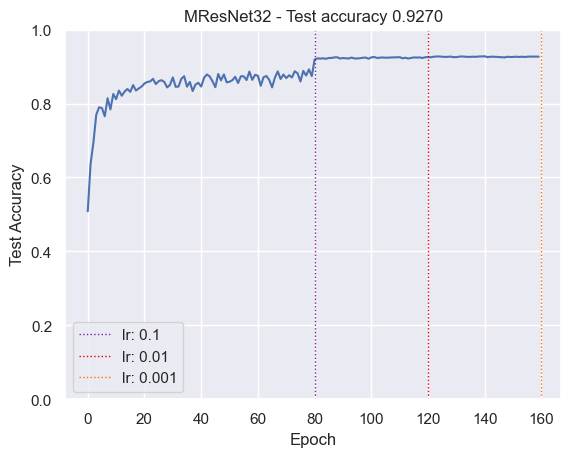

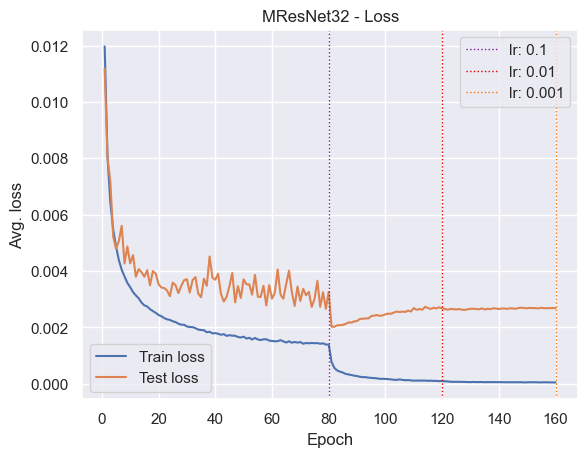

In [13]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet32 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [14]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-44

In [15]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [17]:
net = MResNet(BasicBlock, [7,7,7], num_classes=10, stochastic_depth=False)
net.cuda()
model_name = "MResNet44"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,109                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [18]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:18, 20.80it/s]

Epoch 1 finished, average loss: 0.0117721069
Starting testing


Correct: 5224, total: 10000, accuracy: 0.5223999619, average loss: 0.0104011972


391it [00:18, 20.84it/s]


Epoch 2 finished, average loss: 0.0075571512
Starting testing
Correct: 6473, total: 10000, accuracy: 0.6473000050, average loss: 0.0080987409


391it [00:18, 20.86it/s]

Epoch 3 finished, average loss: 0.0060237614
Starting testing


Correct: 7496, total: 10000, accuracy: 0.7495999932, average loss: 0.0057283949


391it [00:18, 20.90it/s]

Epoch 4 finished, average loss: 0.0051520895
Starting testing


Correct: 7588, total: 10000, accuracy: 0.7587999701, average loss: 0.0055060843


391it [00:18, 20.91it/s]

Epoch 5 finished, average loss: 0.0046305065
Starting testing


Correct: 7815, total: 10000, accuracy: 0.7814999819, average loss: 0.0050250059


391it [00:18, 20.87it/s]

Epoch 6 finished, average loss: 0.0041562112
Starting testing


Correct: 8108, total: 10000, accuracy: 0.8107999563, average loss: 0.0044357448


391it [00:18, 20.83it/s]

Epoch 7 finished, average loss: 0.0039108144
Starting testing


Correct: 7621, total: 10000, accuracy: 0.7620999813, average loss: 0.0058430871


391it [00:18, 20.90it/s]

Epoch 8 finished, average loss: 0.0036652627
Starting testing


Correct: 8086, total: 10000, accuracy: 0.8086000085, average loss: 0.0045780423


391it [00:18, 20.84it/s]

Epoch 9 finished, average loss: 0.0034228872
Starting testing


Correct: 8314, total: 10000, accuracy: 0.8313999772, average loss: 0.0039338530


391it [00:18, 20.83it/s]

Epoch 10 finished, average loss: 0.0032833647
Starting testing


Correct: 8246, total: 10000, accuracy: 0.8245999813, average loss: 0.0041250154


391it [00:18, 20.83it/s]

Epoch 11 finished, average loss: 0.0031223555
Starting testing


Correct: 8143, total: 10000, accuracy: 0.8143000007, average loss: 0.0044235360


391it [00:18, 20.90it/s]

Epoch 12 finished, average loss: 0.0029730075
Starting testing


Correct: 8320, total: 10000, accuracy: 0.8319999576, average loss: 0.0040020961


391it [00:18, 20.99it/s]

Epoch 13 finished, average loss: 0.0028597795
Starting testing


Correct: 7979, total: 10000, accuracy: 0.7978999615, average loss: 0.0050997143


391it [00:18, 20.94it/s]

Epoch 14 finished, average loss: 0.0027483750
Starting testing


Correct: 8420, total: 10000, accuracy: 0.8420000076, average loss: 0.0038170942


391it [00:18, 20.94it/s]

Epoch 15 finished, average loss: 0.0026697311
Starting testing


Correct: 8541, total: 10000, accuracy: 0.8540999889, average loss: 0.0034174824


391it [00:18, 20.81it/s]

Epoch 16 finished, average loss: 0.0026024998
Starting testing


Correct: 8473, total: 10000, accuracy: 0.8472999930, average loss: 0.0036469740


391it [00:18, 20.84it/s]

Epoch 17 finished, average loss: 0.0024862577
Starting testing


Correct: 8328, total: 10000, accuracy: 0.8327999711, average loss: 0.0038556747


391it [00:18, 20.91it/s]

Epoch 18 finished, average loss: 0.0024494649
Starting testing


Correct: 8661, total: 10000, accuracy: 0.8660999537, average loss: 0.0032527752


391it [00:18, 20.92it/s]

Epoch 19 finished, average loss: 0.0023310381
Starting testing


Correct: 8621, total: 10000, accuracy: 0.8621000051, average loss: 0.0032471159


391it [00:18, 20.82it/s]

Epoch 20 finished, average loss: 0.0023098213
Starting testing


Correct: 8591, total: 10000, accuracy: 0.8590999842, average loss: 0.0034065522


391it [00:18, 20.90it/s]


Epoch 21 finished, average loss: 0.0022493972
Starting testing
Correct: 8636, total: 10000, accuracy: 0.8635999560, average loss: 0.0032881557


391it [00:18, 20.87it/s]

Epoch 22 finished, average loss: 0.0022231007
Starting testing


Correct: 8571, total: 10000, accuracy: 0.8570999503, average loss: 0.0034239442


391it [00:18, 20.95it/s]

Epoch 23 finished, average loss: 0.0021408734
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0033287419


391it [00:18, 20.92it/s]

Epoch 24 finished, average loss: 0.0021097635
Starting testing


Correct: 8576, total: 10000, accuracy: 0.8575999737, average loss: 0.0033771485


391it [00:18, 20.89it/s]


Epoch 25 finished, average loss: 0.0021114774
Starting testing
Correct: 8713, total: 10000, accuracy: 0.8712999821, average loss: 0.0031368322


391it [00:18, 20.89it/s]

Epoch 26 finished, average loss: 0.0020743680
Starting testing


Correct: 8771, total: 10000, accuracy: 0.8770999908, average loss: 0.0029372310


391it [00:18, 20.92it/s]

Epoch 27 finished, average loss: 0.0019846610
Starting testing


Correct: 8417, total: 10000, accuracy: 0.8416999578, average loss: 0.0038105674


391it [00:18, 20.78it/s]

Epoch 28 finished, average loss: 0.0019660509
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0032019177


391it [00:18, 20.81it/s]

Epoch 29 finished, average loss: 0.0019221835
Starting testing


Correct: 8652, total: 10000, accuracy: 0.8651999831, average loss: 0.0032671754


391it [00:18, 20.86it/s]

Epoch 30 finished, average loss: 0.0019119356
Starting testing


Correct: 8633, total: 10000, accuracy: 0.8632999659, average loss: 0.0034205360


391it [00:18, 20.86it/s]

Epoch 31 finished, average loss: 0.0018675066
Starting testing


Correct: 8695, total: 10000, accuracy: 0.8694999814, average loss: 0.0032736698


391it [00:18, 20.80it/s]

Epoch 32 finished, average loss: 0.0018495995
Starting testing


Correct: 8757, total: 10000, accuracy: 0.8756999969, average loss: 0.0030724150


391it [00:18, 20.86it/s]

Epoch 33 finished, average loss: 0.0018067632
Starting testing


Correct: 8650, total: 10000, accuracy: 0.8649999499, average loss: 0.0032423268


391it [00:18, 20.80it/s]

Epoch 34 finished, average loss: 0.0018255010
Starting testing


Correct: 8782, total: 10000, accuracy: 0.8781999946, average loss: 0.0030306016


391it [00:18, 20.90it/s]

Epoch 35 finished, average loss: 0.0017772588
Starting testing


Correct: 8625, total: 10000, accuracy: 0.8624999523, average loss: 0.0033920068


391it [00:18, 20.88it/s]

Epoch 36 finished, average loss: 0.0017343272
Starting testing


Correct: 8819, total: 10000, accuracy: 0.8818999529, average loss: 0.0030513761


391it [00:18, 20.79it/s]

Epoch 37 finished, average loss: 0.0017303367
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0029986443


391it [00:18, 20.92it/s]

Epoch 38 finished, average loss: 0.0017240283
Starting testing


Correct: 8584, total: 10000, accuracy: 0.8583999872, average loss: 0.0034384056


391it [00:18, 20.89it/s]

Epoch 39 finished, average loss: 0.0016924080
Starting testing


Correct: 8713, total: 10000, accuracy: 0.8712999821, average loss: 0.0032260839


391it [00:18, 20.84it/s]

Epoch 40 finished, average loss: 0.0016676970
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0029814574


391it [00:18, 20.73it/s]

Epoch 41 finished, average loss: 0.0016381174
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0028038012


391it [00:18, 20.71it/s]

Epoch 42 finished, average loss: 0.0016223644
Starting testing


Correct: 8618, total: 10000, accuracy: 0.8617999554, average loss: 0.0033420462


391it [00:18, 20.83it/s]

Epoch 43 finished, average loss: 0.0015891319
Starting testing


Correct: 8995, total: 10000, accuracy: 0.8994999528, average loss: 0.0024903927


391it [00:18, 20.84it/s]


Epoch 44 finished, average loss: 0.0016378605
Starting testing
Correct: 8681, total: 10000, accuracy: 0.8680999875, average loss: 0.0032606674


391it [00:18, 20.91it/s]

Epoch 45 finished, average loss: 0.0016133585
Starting testing


Correct: 8760, total: 10000, accuracy: 0.8759999871, average loss: 0.0030582809


391it [00:18, 20.86it/s]

Epoch 46 finished, average loss: 0.0016056941
Starting testing


Correct: 8820, total: 10000, accuracy: 0.8819999695, average loss: 0.0028989053


391it [00:18, 20.92it/s]

Epoch 47 finished, average loss: 0.0015434243
Starting testing


Correct: 8518, total: 10000, accuracy: 0.8517999649, average loss: 0.0040290093


391it [00:18, 20.87it/s]

Epoch 48 finished, average loss: 0.0014988425
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0027437262


391it [00:18, 20.84it/s]

Epoch 49 finished, average loss: 0.0014850675
Starting testing


Correct: 8726, total: 10000, accuracy: 0.8725999594, average loss: 0.0032457319


391it [00:18, 20.81it/s]

Epoch 50 finished, average loss: 0.0015330701
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0031525436


391it [00:18, 20.84it/s]

Epoch 51 finished, average loss: 0.0015226373
Starting testing


Correct: 8746, total: 10000, accuracy: 0.8745999932, average loss: 0.0032160242


391it [00:18, 20.93it/s]

Epoch 52 finished, average loss: 0.0014808067
Starting testing


Correct: 8579, total: 10000, accuracy: 0.8578999639, average loss: 0.0038816687


391it [00:18, 20.90it/s]

Epoch 53 finished, average loss: 0.0014742879
Starting testing


Correct: 8888, total: 10000, accuracy: 0.8887999654, average loss: 0.0027656697


391it [00:18, 20.89it/s]

Epoch 54 finished, average loss: 0.0014739758
Starting testing


Correct: 8739, total: 10000, accuracy: 0.8738999963, average loss: 0.0032151770


391it [00:18, 20.88it/s]


Epoch 55 finished, average loss: 0.0014824013
Starting testing
Correct: 8751, total: 10000, accuracy: 0.8750999570, average loss: 0.0032570588


391it [00:18, 20.84it/s]

Epoch 56 finished, average loss: 0.0014644315
Starting testing


Correct: 8690, total: 10000, accuracy: 0.8689999580, average loss: 0.0033913243


391it [00:18, 20.75it/s]

Epoch 57 finished, average loss: 0.0014598311
Starting testing


Correct: 8752, total: 10000, accuracy: 0.8751999736, average loss: 0.0032760494


391it [00:18, 20.90it/s]

Epoch 58 finished, average loss: 0.0014334358
Starting testing


Correct: 8509, total: 10000, accuracy: 0.8508999944, average loss: 0.0038291695


391it [00:18, 20.81it/s]

Epoch 59 finished, average loss: 0.0014685970
Starting testing


Correct: 8845, total: 10000, accuracy: 0.8844999671, average loss: 0.0028522850


391it [00:18, 20.93it/s]

Epoch 60 finished, average loss: 0.0014019438
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0033367018


391it [00:18, 20.86it/s]

Epoch 61 finished, average loss: 0.0013902375
Starting testing


Correct: 8691, total: 10000, accuracy: 0.8690999746, average loss: 0.0032811947


391it [00:18, 20.82it/s]

Epoch 62 finished, average loss: 0.0014297050
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0027547839


391it [00:18, 20.83it/s]

Epoch 63 finished, average loss: 0.0013921655
Starting testing


Correct: 8897, total: 10000, accuracy: 0.8896999955, average loss: 0.0028731727


391it [00:18, 20.77it/s]

Epoch 64 finished, average loss: 0.0014065051
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0029162087


391it [00:18, 20.78it/s]

Epoch 65 finished, average loss: 0.0013852583
Starting testing


Correct: 8701, total: 10000, accuracy: 0.8700999618, average loss: 0.0033131392


391it [00:18, 20.83it/s]

Epoch 66 finished, average loss: 0.0013686948
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0033219803


391it [00:18, 20.82it/s]

Epoch 67 finished, average loss: 0.0013812587
Starting testing


Correct: 8951, total: 10000, accuracy: 0.8950999975, average loss: 0.0025635746


391it [00:18, 20.88it/s]

Epoch 68 finished, average loss: 0.0013696492
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0029970963


391it [00:18, 20.87it/s]

Epoch 69 finished, average loss: 0.0013397653
Starting testing


Correct: 8698, total: 10000, accuracy: 0.8697999716, average loss: 0.0033233589


391it [00:18, 20.90it/s]

Epoch 70 finished, average loss: 0.0013183470
Starting testing


Correct: 8780, total: 10000, accuracy: 0.8779999614, average loss: 0.0031054979


391it [00:18, 20.88it/s]

Epoch 71 finished, average loss: 0.0013990610
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0028797167


391it [00:18, 20.90it/s]

Epoch 72 finished, average loss: 0.0013386780
Starting testing


Correct: 8748, total: 10000, accuracy: 0.8747999668, average loss: 0.0033423583


391it [00:18, 20.89it/s]

Epoch 73 finished, average loss: 0.0013537288
Starting testing


Correct: 8823, total: 10000, accuracy: 0.8822999597, average loss: 0.0029120856


391it [00:18, 20.82it/s]

Epoch 74 finished, average loss: 0.0013003000
Starting testing


Correct: 8624, total: 10000, accuracy: 0.8623999953, average loss: 0.0035630612


391it [00:18, 20.72it/s]

Epoch 75 finished, average loss: 0.0013191687
Starting testing


Correct: 8879, total: 10000, accuracy: 0.8878999949, average loss: 0.0028545228


391it [00:18, 20.79it/s]

Epoch 76 finished, average loss: 0.0013537153
Starting testing


Correct: 8696, total: 10000, accuracy: 0.8695999980, average loss: 0.0034514269


391it [00:18, 20.79it/s]

Epoch 77 finished, average loss: 0.0012842111
Starting testing


Correct: 8740, total: 10000, accuracy: 0.8739999533, average loss: 0.0035177837


391it [00:18, 20.87it/s]

Epoch 78 finished, average loss: 0.0013286807
Starting testing


Correct: 8728, total: 10000, accuracy: 0.8727999926, average loss: 0.0032357739


391it [00:18, 20.77it/s]

Epoch 79 finished, average loss: 0.0012746611
Starting testing


Correct: 8892, total: 10000, accuracy: 0.8891999722, average loss: 0.0027514462


391it [00:18, 20.86it/s]

Epoch 80 finished, average loss: 0.0012827800
Starting testing


Correct: 8926, total: 10000, accuracy: 0.8925999999, average loss: 0.0027498031


391it [00:18, 20.87it/s]

Epoch 81 finished, average loss: 0.0006665580
Starting testing


Correct: 9220, total: 10000, accuracy: 0.9219999909, average loss: 0.0019084774


391it [00:18, 20.81it/s]

Epoch 82 finished, average loss: 0.0004411916
Starting testing


Correct: 9229, total: 10000, accuracy: 0.9228999615, average loss: 0.0019250035


391it [00:18, 20.87it/s]

Epoch 83 finished, average loss: 0.0003956284
Starting testing


Correct: 9249, total: 10000, accuracy: 0.9248999953, average loss: 0.0019212462


391it [00:18, 20.64it/s]

Epoch 84 finished, average loss: 0.0003467792
Starting testing


Correct: 9250, total: 10000, accuracy: 0.9249999523, average loss: 0.0019672885


391it [00:18, 20.83it/s]

Epoch 85 finished, average loss: 0.0002993484
Starting testing


Correct: 9245, total: 10000, accuracy: 0.9244999886, average loss: 0.0020030738


391it [00:18, 20.82it/s]

Epoch 86 finished, average loss: 0.0002733655
Starting testing


Correct: 9250, total: 10000, accuracy: 0.9249999523, average loss: 0.0020428996


391it [00:18, 20.85it/s]

Epoch 87 finished, average loss: 0.0002426822
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0020912670


391it [00:18, 20.86it/s]

Epoch 88 finished, average loss: 0.0002297423
Starting testing


Correct: 9276, total: 10000, accuracy: 0.9275999665, average loss: 0.0020818939


391it [00:18, 20.89it/s]

Epoch 89 finished, average loss: 0.0002156342
Starting testing


Correct: 9269, total: 10000, accuracy: 0.9268999696, average loss: 0.0021087924


391it [00:18, 20.85it/s]

Epoch 90 finished, average loss: 0.0002005946
Starting testing


Correct: 9262, total: 10000, accuracy: 0.9261999726, average loss: 0.0022005674


391it [00:18, 20.88it/s]

Epoch 91 finished, average loss: 0.0001751716
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0022046515


391it [00:18, 20.82it/s]

Epoch 92 finished, average loss: 0.0001776151
Starting testing


Correct: 9272, total: 10000, accuracy: 0.9271999598, average loss: 0.0022390620


391it [00:18, 20.89it/s]

Epoch 93 finished, average loss: 0.0001522904
Starting testing


Correct: 9253, total: 10000, accuracy: 0.9253000021, average loss: 0.0022681126


391it [00:18, 20.83it/s]

Epoch 94 finished, average loss: 0.0001477684
Starting testing


Correct: 9263, total: 10000, accuracy: 0.9262999892, average loss: 0.0023231312


391it [00:18, 20.85it/s]

Epoch 95 finished, average loss: 0.0001351480
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0023689437


391it [00:18, 20.86it/s]

Epoch 96 finished, average loss: 0.0001506161
Starting testing


Correct: 9260, total: 10000, accuracy: 0.9259999990, average loss: 0.0023858008


391it [00:18, 20.83it/s]

Epoch 97 finished, average loss: 0.0001396141
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0023916737


391it [00:18, 20.85it/s]

Epoch 98 finished, average loss: 0.0001184470
Starting testing


Correct: 9248, total: 10000, accuracy: 0.9247999787, average loss: 0.0024106484


391it [00:18, 20.85it/s]

Epoch 99 finished, average loss: 0.0001199222
Starting testing


Correct: 9262, total: 10000, accuracy: 0.9261999726, average loss: 0.0024168351


391it [00:18, 20.87it/s]

Epoch 100 finished, average loss: 0.0001190842
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0024155152


391it [00:18, 20.88it/s]

Epoch 101 finished, average loss: 0.0001073144
Starting testing


Correct: 9260, total: 10000, accuracy: 0.9259999990, average loss: 0.0024863879


391it [00:18, 20.83it/s]

Epoch 102 finished, average loss: 0.0000975004
Starting testing


Correct: 9270, total: 10000, accuracy: 0.9269999862, average loss: 0.0024612455


391it [00:18, 20.81it/s]

Epoch 103 finished, average loss: 0.0001084514
Starting testing


Correct: 9266, total: 10000, accuracy: 0.9265999794, average loss: 0.0024411219


391it [00:18, 20.90it/s]

Epoch 104 finished, average loss: 0.0000898002
Starting testing


Correct: 9252, total: 10000, accuracy: 0.9251999855, average loss: 0.0025182888


391it [00:18, 20.84it/s]

Epoch 105 finished, average loss: 0.0000945700
Starting testing


Correct: 9256, total: 10000, accuracy: 0.9255999923, average loss: 0.0025307619


391it [00:18, 20.88it/s]

Epoch 106 finished, average loss: 0.0000860524
Starting testing


Correct: 9257, total: 10000, accuracy: 0.9256999493, average loss: 0.0025482829


391it [00:18, 20.86it/s]

Epoch 107 finished, average loss: 0.0000836266
Starting testing


Correct: 9263, total: 10000, accuracy: 0.9262999892, average loss: 0.0025722494


391it [00:18, 20.81it/s]

Epoch 108 finished, average loss: 0.0000806152
Starting testing


Correct: 9283, total: 10000, accuracy: 0.9282999635, average loss: 0.0025374626


391it [00:18, 20.85it/s]

Epoch 109 finished, average loss: 0.0000876823
Starting testing


Correct: 9278, total: 10000, accuracy: 0.9277999997, average loss: 0.0025644754


391it [00:18, 20.79it/s]

Epoch 110 finished, average loss: 0.0000840808
Starting testing


Correct: 9268, total: 10000, accuracy: 0.9267999530, average loss: 0.0025694936


391it [00:18, 20.85it/s]

Epoch 111 finished, average loss: 0.0000760308
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0025757227


391it [00:18, 20.94it/s]

Epoch 112 finished, average loss: 0.0000860168
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0025565114


391it [00:18, 20.88it/s]

Epoch 113 finished, average loss: 0.0000687260
Starting testing


Correct: 9261, total: 10000, accuracy: 0.9260999560, average loss: 0.0025927759


391it [00:18, 20.88it/s]

Epoch 114 finished, average loss: 0.0000726498
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0026316482


391it [00:18, 20.90it/s]

Epoch 115 finished, average loss: 0.0000630177
Starting testing


Correct: 9288, total: 10000, accuracy: 0.9287999868, average loss: 0.0026348336


391it [00:18, 20.88it/s]

Epoch 116 finished, average loss: 0.0000685674
Starting testing


Correct: 9283, total: 10000, accuracy: 0.9282999635, average loss: 0.0026496927


391it [00:18, 20.85it/s]

Epoch 117 finished, average loss: 0.0000692304
Starting testing


Correct: 9289, total: 10000, accuracy: 0.9289000034, average loss: 0.0026349929


391it [00:18, 20.89it/s]

Epoch 118 finished, average loss: 0.0000632255
Starting testing


Correct: 9273, total: 10000, accuracy: 0.9272999763, average loss: 0.0026411772


391it [00:18, 20.90it/s]

Epoch 119 finished, average loss: 0.0000670299
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0026509298


391it [00:18, 20.80it/s]

Epoch 120 finished, average loss: 0.0000665883
Starting testing


Correct: 9261, total: 10000, accuracy: 0.9260999560, average loss: 0.0026727799


391it [00:18, 20.82it/s]

Epoch 121 finished, average loss: 0.0000549651
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0026407081


391it [00:18, 20.91it/s]

Epoch 122 finished, average loss: 0.0000526526
Starting testing


Correct: 9300, total: 10000, accuracy: 0.9299999475, average loss: 0.0026196267


391it [00:18, 20.82it/s]


Epoch 123 finished, average loss: 0.0000448381
Starting testing
Correct: 9289, total: 10000, accuracy: 0.9289000034, average loss: 0.0026126479


391it [00:18, 20.83it/s]

Epoch 124 finished, average loss: 0.0000440351
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0025963753


391it [00:18, 20.87it/s]

Epoch 125 finished, average loss: 0.0000427979
Starting testing


Correct: 9302, total: 10000, accuracy: 0.9301999807, average loss: 0.0026073290


391it [00:18, 20.85it/s]

Epoch 126 finished, average loss: 0.0000437829
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0026086469


391it [00:18, 20.84it/s]

Epoch 127 finished, average loss: 0.0000423393
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0026144608


391it [00:18, 20.83it/s]

Epoch 128 finished, average loss: 0.0000426619
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0026214373


391it [00:18, 20.84it/s]

Epoch 129 finished, average loss: 0.0000413100
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0026113626


391it [00:18, 20.90it/s]

Epoch 130 finished, average loss: 0.0000432543
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0026237464


391it [00:18, 20.83it/s]

Epoch 131 finished, average loss: 0.0000404239
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0026103473


391it [00:18, 20.69it/s]

Epoch 132 finished, average loss: 0.0000403885
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0026193972


391it [00:18, 20.87it/s]


Epoch 133 finished, average loss: 0.0000378875
Starting testing
Correct: 9290, total: 10000, accuracy: 0.9289999604, average loss: 0.0026116058


391it [00:18, 20.76it/s]

Epoch 134 finished, average loss: 0.0000368252
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0026143751


391it [00:18, 20.87it/s]

Epoch 135 finished, average loss: 0.0000397298
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0026037911


391it [00:18, 20.86it/s]

Epoch 136 finished, average loss: 0.0000341953
Starting testing


Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0026229269


391it [00:18, 20.87it/s]

Epoch 137 finished, average loss: 0.0000354699
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0026390368


391it [00:18, 20.73it/s]

Epoch 138 finished, average loss: 0.0000357562
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0026288235


391it [00:18, 20.91it/s]

Epoch 139 finished, average loss: 0.0000382197
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0026119236


391it [00:18, 20.86it/s]

Epoch 140 finished, average loss: 0.0000364503
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0026205220


391it [00:18, 20.90it/s]

Epoch 141 finished, average loss: 0.0000324970
Starting testing


Correct: 9303, total: 10000, accuracy: 0.9302999973, average loss: 0.0026265413


391it [00:18, 20.91it/s]

Epoch 142 finished, average loss: 0.0000371306
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0026939491


391it [00:18, 20.89it/s]

Epoch 143 finished, average loss: 0.0000335011
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0026148058


391it [00:18, 20.83it/s]

Epoch 144 finished, average loss: 0.0000304321
Starting testing


Correct: 9298, total: 10000, accuracy: 0.9297999740, average loss: 0.0026285203


391it [00:18, 20.84it/s]

Epoch 145 finished, average loss: 0.0000329667
Starting testing


Correct: 9300, total: 10000, accuracy: 0.9299999475, average loss: 0.0026355540


391it [00:18, 20.83it/s]

Epoch 146 finished, average loss: 0.0000313029
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0026334831


391it [00:18, 20.83it/s]

Epoch 147 finished, average loss: 0.0000316992
Starting testing


Correct: 9304, total: 10000, accuracy: 0.9303999543, average loss: 0.0026357096


391it [00:18, 20.87it/s]

Epoch 148 finished, average loss: 0.0000364905
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0026414747


391it [00:18, 20.81it/s]

Epoch 149 finished, average loss: 0.0000324560
Starting testing


Correct: 9289, total: 10000, accuracy: 0.9289000034, average loss: 0.0026104551


391it [00:18, 20.79it/s]

Epoch 150 finished, average loss: 0.0000303492
Starting testing


Correct: 9292, total: 10000, accuracy: 0.9291999936, average loss: 0.0026480177


391it [00:18, 20.84it/s]

Epoch 151 finished, average loss: 0.0000322408
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0026493166


391it [00:18, 20.80it/s]

Epoch 152 finished, average loss: 0.0000326240
Starting testing


Correct: 9295, total: 10000, accuracy: 0.9294999838, average loss: 0.0026615736


391it [00:18, 20.83it/s]

Epoch 153 finished, average loss: 0.0000306803
Starting testing


Correct: 9302, total: 10000, accuracy: 0.9301999807, average loss: 0.0026661693


391it [00:18, 20.86it/s]

Epoch 154 finished, average loss: 0.0000330554
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0026866045


391it [00:18, 20.92it/s]

Epoch 155 finished, average loss: 0.0000348179
Starting testing


Correct: 9304, total: 10000, accuracy: 0.9303999543, average loss: 0.0026651099


391it [00:18, 20.90it/s]

Epoch 156 finished, average loss: 0.0000319896
Starting testing


Correct: 9303, total: 10000, accuracy: 0.9302999973, average loss: 0.0026605000


391it [00:18, 20.61it/s]

Epoch 157 finished, average loss: 0.0000336982
Starting testing


Correct: 9303, total: 10000, accuracy: 0.9302999973, average loss: 0.0026807464


391it [00:18, 20.80it/s]

Epoch 158 finished, average loss: 0.0000321665
Starting testing


Correct: 9293, total: 10000, accuracy: 0.9292999506, average loss: 0.0026600050


391it [00:18, 20.85it/s]

Epoch 159 finished, average loss: 0.0000321355
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0026636697


391it [00:18, 20.84it/s]

Epoch 160 finished, average loss: 0.0000308625
Starting testing


Correct: 9293, total: 10000, accuracy: 0.9292999506, average loss: 0.0026920130
CPU times: user 51min 39s, sys: 1min 12s, total: 52min 52s
Wall time: 53min 56s


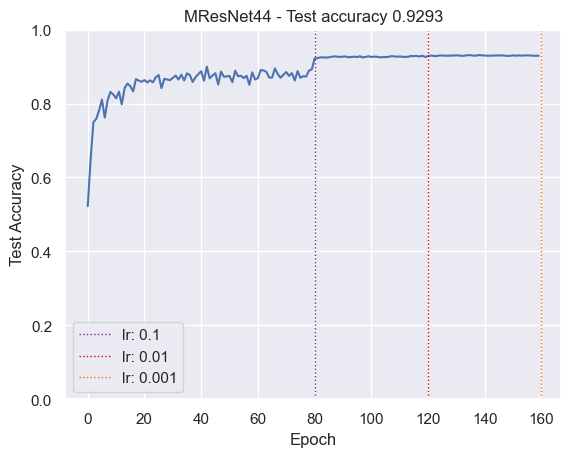

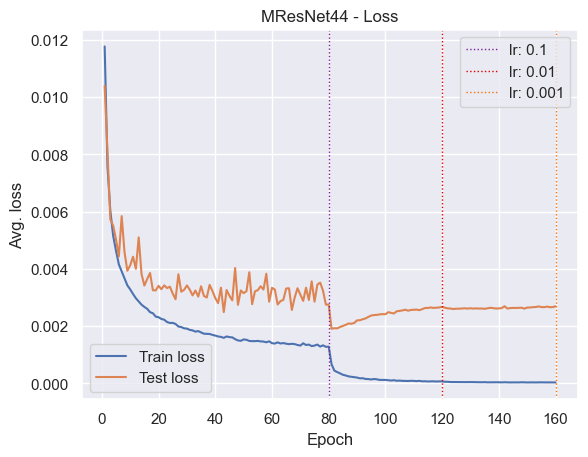

In [19]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet44 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [20]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-56

In [21]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
from torchinfo import summary
from blocks import BasicBlock
from MResNet import MResNet

In [23]:
net = MResNet(BasicBlock, [9,9,9], num_classes=10, stochastic_depth=False)
net.cuda()
model_name = "MResNet56"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,115                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [24]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:23, 16.54it/s]

Epoch 1 finished, average loss: 0.0117613719
Starting testing


Correct: 5416, total: 10000, accuracy: 0.5415999889, average loss: 0.0099397279


391it [00:23, 16.54it/s]

Epoch 2 finished, average loss: 0.0077832481
Starting testing


Correct: 6613, total: 10000, accuracy: 0.6613000035, average loss: 0.0077361764


391it [00:23, 16.56it/s]

Epoch 3 finished, average loss: 0.0061902089
Starting testing


Correct: 7405, total: 10000, accuracy: 0.7404999733, average loss: 0.0058045163


391it [00:23, 16.51it/s]

Epoch 4 finished, average loss: 0.0052217621
Starting testing


Correct: 7431, total: 10000, accuracy: 0.7430999875, average loss: 0.0057413824


391it [00:23, 16.48it/s]

Epoch 5 finished, average loss: 0.0046331571
Starting testing


Correct: 6991, total: 10000, accuracy: 0.6990999579, average loss: 0.0075163991


391it [00:23, 16.49it/s]

Epoch 6 finished, average loss: 0.0042460126
Starting testing


Correct: 7748, total: 10000, accuracy: 0.7748000026, average loss: 0.0051472314


391it [00:23, 16.50it/s]

Epoch 7 finished, average loss: 0.0038993635
Starting testing


Correct: 8090, total: 10000, accuracy: 0.8089999557, average loss: 0.0044583132


391it [00:23, 16.52it/s]

Epoch 8 finished, average loss: 0.0035916086
Starting testing


Correct: 8188, total: 10000, accuracy: 0.8187999725, average loss: 0.0042289246


391it [00:23, 16.53it/s]

Epoch 9 finished, average loss: 0.0034628137
Starting testing


Correct: 8118, total: 10000, accuracy: 0.8118000031, average loss: 0.0044744255


391it [00:23, 16.50it/s]

Epoch 10 finished, average loss: 0.0031743998
Starting testing


Correct: 8078, total: 10000, accuracy: 0.8077999949, average loss: 0.0044711507


391it [00:23, 16.51it/s]

Epoch 11 finished, average loss: 0.0030740117
Starting testing


Correct: 7972, total: 10000, accuracy: 0.7971999645, average loss: 0.0046958334


391it [00:23, 16.54it/s]

Epoch 12 finished, average loss: 0.0028962583
Starting testing


Correct: 8234, total: 10000, accuracy: 0.8233999610, average loss: 0.0041752766


391it [00:23, 16.50it/s]

Epoch 13 finished, average loss: 0.0028406967
Starting testing


Correct: 8444, total: 10000, accuracy: 0.8443999887, average loss: 0.0036078261


391it [00:23, 16.57it/s]

Epoch 14 finished, average loss: 0.0026915272
Starting testing


Correct: 8503, total: 10000, accuracy: 0.8502999544, average loss: 0.0035188647


391it [00:23, 16.52it/s]

Epoch 15 finished, average loss: 0.0025851370
Starting testing


Correct: 8564, total: 10000, accuracy: 0.8563999534, average loss: 0.0033818658


391it [00:23, 16.46it/s]

Epoch 16 finished, average loss: 0.0025069913
Starting testing


Correct: 8288, total: 10000, accuracy: 0.8287999630, average loss: 0.0039757300


391it [00:23, 16.49it/s]

Epoch 17 finished, average loss: 0.0024287061
Starting testing


Correct: 8562, total: 10000, accuracy: 0.8561999798, average loss: 0.0033306540


391it [00:23, 16.51it/s]

Epoch 18 finished, average loss: 0.0023402688
Starting testing


Correct: 8642, total: 10000, accuracy: 0.8641999960, average loss: 0.0031352522


391it [00:23, 16.54it/s]

Epoch 19 finished, average loss: 0.0022894729
Starting testing


Correct: 8324, total: 10000, accuracy: 0.8323999643, average loss: 0.0041229532


391it [00:23, 16.53it/s]

Epoch 20 finished, average loss: 0.0022412216
Starting testing


Correct: 8644, total: 10000, accuracy: 0.8643999696, average loss: 0.0031331560


391it [00:23, 16.42it/s]

Epoch 21 finished, average loss: 0.0021933849
Starting testing


Correct: 8589, total: 10000, accuracy: 0.8588999510, average loss: 0.0033820961


391it [00:23, 16.50it/s]

Epoch 22 finished, average loss: 0.0021627188
Starting testing


Correct: 8652, total: 10000, accuracy: 0.8651999831, average loss: 0.0032130246


391it [00:23, 16.53it/s]

Epoch 23 finished, average loss: 0.0020798175
Starting testing


Correct: 8653, total: 10000, accuracy: 0.8652999997, average loss: 0.0032659890


391it [00:23, 16.53it/s]

Epoch 24 finished, average loss: 0.0020677008
Starting testing


Correct: 8600, total: 10000, accuracy: 0.8599999547, average loss: 0.0033069423


391it [00:23, 16.52it/s]

Epoch 25 finished, average loss: 0.0019936083
Starting testing


Correct: 8598, total: 10000, accuracy: 0.8597999811, average loss: 0.0033659158


391it [00:23, 16.53it/s]

Epoch 26 finished, average loss: 0.0019377941
Starting testing


Correct: 8723, total: 10000, accuracy: 0.8722999692, average loss: 0.0031176053


391it [00:23, 16.47it/s]

Epoch 27 finished, average loss: 0.0019301428
Starting testing


Correct: 8560, total: 10000, accuracy: 0.8560000062, average loss: 0.0034905957


391it [00:23, 16.52it/s]

Epoch 28 finished, average loss: 0.0018690631
Starting testing


Correct: 8697, total: 10000, accuracy: 0.8696999550, average loss: 0.0031507641


391it [00:23, 16.53it/s]

Epoch 29 finished, average loss: 0.0018656763
Starting testing


Correct: 8645, total: 10000, accuracy: 0.8644999862, average loss: 0.0032997722


391it [00:23, 16.51it/s]

Epoch 30 finished, average loss: 0.0018213520
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0029253355


391it [00:23, 16.46it/s]


Epoch 31 finished, average loss: 0.0017948392
Starting testing
Correct: 8538, total: 10000, accuracy: 0.8537999988, average loss: 0.0035256983


391it [00:23, 16.52it/s]

Epoch 32 finished, average loss: 0.0017896912
Starting testing


Correct: 8606, total: 10000, accuracy: 0.8605999947, average loss: 0.0034576429


391it [00:23, 16.49it/s]

Epoch 33 finished, average loss: 0.0017850197
Starting testing


Correct: 8646, total: 10000, accuracy: 0.8646000028, average loss: 0.0033408998


391it [00:23, 16.51it/s]

Epoch 34 finished, average loss: 0.0017330429
Starting testing


Correct: 8787, total: 10000, accuracy: 0.8786999583, average loss: 0.0028867040


391it [00:23, 16.46it/s]


Epoch 35 finished, average loss: 0.0017114972
Starting testing
Correct: 8558, total: 10000, accuracy: 0.8557999730, average loss: 0.0037126505


391it [00:23, 16.55it/s]

Epoch 36 finished, average loss: 0.0016761810
Starting testing


Correct: 8710, total: 10000, accuracy: 0.8709999919, average loss: 0.0031812815


391it [00:23, 16.53it/s]

Epoch 37 finished, average loss: 0.0016333458
Starting testing


Correct: 8831, total: 10000, accuracy: 0.8830999732, average loss: 0.0028815299


391it [00:23, 16.54it/s]

Epoch 38 finished, average loss: 0.0016463741
Starting testing


Correct: 8720, total: 10000, accuracy: 0.8719999790, average loss: 0.0031905090


391it [00:23, 16.48it/s]

Epoch 39 finished, average loss: 0.0016529425
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0029413106


391it [00:23, 16.50it/s]

Epoch 40 finished, average loss: 0.0016093761
Starting testing


Correct: 8857, total: 10000, accuracy: 0.8856999874, average loss: 0.0028087779


391it [00:23, 16.49it/s]

Epoch 41 finished, average loss: 0.0015957147
Starting testing


Correct: 8669, total: 10000, accuracy: 0.8668999672, average loss: 0.0033214730


391it [00:23, 16.48it/s]

Epoch 42 finished, average loss: 0.0015590352
Starting testing


Correct: 8744, total: 10000, accuracy: 0.8743999600, average loss: 0.0031481009


391it [00:23, 16.54it/s]

Epoch 43 finished, average loss: 0.0015579056
Starting testing


Correct: 8752, total: 10000, accuracy: 0.8751999736, average loss: 0.0031060832


391it [00:23, 16.55it/s]

Epoch 44 finished, average loss: 0.0015196838
Starting testing


Correct: 8768, total: 10000, accuracy: 0.8768000007, average loss: 0.0030214061


391it [00:23, 16.51it/s]

Epoch 45 finished, average loss: 0.0015409124
Starting testing


Correct: 8911, total: 10000, accuracy: 0.8910999894, average loss: 0.0027089019


391it [00:23, 16.57it/s]

Epoch 46 finished, average loss: 0.0015211534
Starting testing


Correct: 8678, total: 10000, accuracy: 0.8677999973, average loss: 0.0034721844


391it [00:23, 16.53it/s]

Epoch 47 finished, average loss: 0.0014600214
Starting testing


Correct: 8864, total: 10000, accuracy: 0.8863999844, average loss: 0.0026973964


391it [00:23, 16.53it/s]

Epoch 48 finished, average loss: 0.0014872814
Starting testing


Correct: 8899, total: 10000, accuracy: 0.8898999691, average loss: 0.0027393146


391it [00:23, 16.49it/s]

Epoch 49 finished, average loss: 0.0014790361
Starting testing


Correct: 8860, total: 10000, accuracy: 0.8859999776, average loss: 0.0027912494


391it [00:23, 16.54it/s]

Epoch 50 finished, average loss: 0.0014901500
Starting testing


Correct: 8854, total: 10000, accuracy: 0.8853999972, average loss: 0.0027552745


391it [00:23, 16.44it/s]

Epoch 51 finished, average loss: 0.0014315497
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0035227293


391it [00:23, 16.54it/s]

Epoch 52 finished, average loss: 0.0014210967
Starting testing


Correct: 8785, total: 10000, accuracy: 0.8784999847, average loss: 0.0031367427


391it [00:23, 16.50it/s]

Epoch 53 finished, average loss: 0.0014244889
Starting testing


Correct: 8676, total: 10000, accuracy: 0.8675999641, average loss: 0.0035520608


391it [00:23, 16.52it/s]

Epoch 54 finished, average loss: 0.0014300750
Starting testing


Correct: 8761, total: 10000, accuracy: 0.8761000037, average loss: 0.0031034467


391it [00:23, 16.53it/s]

Epoch 55 finished, average loss: 0.0013741169
Starting testing


Correct: 8697, total: 10000, accuracy: 0.8696999550, average loss: 0.0031826484


391it [00:23, 16.52it/s]

Epoch 56 finished, average loss: 0.0013906480
Starting testing


Correct: 8623, total: 10000, accuracy: 0.8622999787, average loss: 0.0035216567


391it [00:23, 16.54it/s]

Epoch 57 finished, average loss: 0.0013825555
Starting testing


Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0029045852


391it [00:23, 16.52it/s]

Epoch 58 finished, average loss: 0.0013314700
Starting testing


Correct: 8850, total: 10000, accuracy: 0.8849999905, average loss: 0.0028884441


391it [00:23, 16.51it/s]

Epoch 59 finished, average loss: 0.0013967613
Starting testing


Correct: 8727, total: 10000, accuracy: 0.8726999760, average loss: 0.0031491117


391it [00:23, 16.50it/s]

Epoch 60 finished, average loss: 0.0013810448
Starting testing


Correct: 8771, total: 10000, accuracy: 0.8770999908, average loss: 0.0030038961


391it [00:23, 16.55it/s]

Epoch 61 finished, average loss: 0.0013314622
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0029902490


391it [00:23, 16.54it/s]

Epoch 62 finished, average loss: 0.0013220227
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0030952114


391it [00:23, 16.50it/s]


Epoch 63 finished, average loss: 0.0013603825
Starting testing
Correct: 8777, total: 10000, accuracy: 0.8776999712, average loss: 0.0030997077


391it [00:23, 16.52it/s]

Epoch 64 finished, average loss: 0.0013464150
Starting testing


Correct: 8646, total: 10000, accuracy: 0.8646000028, average loss: 0.0034573700


391it [00:23, 16.52it/s]

Epoch 65 finished, average loss: 0.0013008730
Starting testing


Correct: 8764, total: 10000, accuracy: 0.8763999939, average loss: 0.0029918709


391it [00:23, 16.54it/s]

Epoch 66 finished, average loss: 0.0013211288
Starting testing


Correct: 8820, total: 10000, accuracy: 0.8819999695, average loss: 0.0029562901


391it [00:23, 16.48it/s]

Epoch 67 finished, average loss: 0.0012224956
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0027120143


391it [00:23, 16.49it/s]


Epoch 68 finished, average loss: 0.0012878156
Starting testing
Correct: 8831, total: 10000, accuracy: 0.8830999732, average loss: 0.0028072871


391it [00:23, 16.51it/s]

Epoch 69 finished, average loss: 0.0012716657
Starting testing


Correct: 8672, total: 10000, accuracy: 0.8671999574, average loss: 0.0033374454


391it [00:23, 16.55it/s]

Epoch 70 finished, average loss: 0.0012806971
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0029366472


391it [00:23, 16.52it/s]

Epoch 71 finished, average loss: 0.0012572255
Starting testing


Correct: 8633, total: 10000, accuracy: 0.8632999659, average loss: 0.0036715532


391it [00:23, 16.52it/s]

Epoch 72 finished, average loss: 0.0012592418
Starting testing


Correct: 8933, total: 10000, accuracy: 0.8932999969, average loss: 0.0026696388


391it [00:23, 16.44it/s]


Epoch 73 finished, average loss: 0.0012824247
Starting testing
Correct: 8908, total: 10000, accuracy: 0.8907999992, average loss: 0.0027595053


391it [00:23, 16.53it/s]

Epoch 74 finished, average loss: 0.0012636855
Starting testing


Correct: 8919, total: 10000, accuracy: 0.8919000030, average loss: 0.0026902777


391it [00:23, 16.52it/s]

Epoch 75 finished, average loss: 0.0012517509
Starting testing


Correct: 8934, total: 10000, accuracy: 0.8933999538, average loss: 0.0026405094


391it [00:23, 16.50it/s]

Epoch 76 finished, average loss: 0.0012310595
Starting testing


Correct: 8421, total: 10000, accuracy: 0.8420999646, average loss: 0.0041600211


391it [00:23, 16.47it/s]

Epoch 77 finished, average loss: 0.0012393757
Starting testing


Correct: 8723, total: 10000, accuracy: 0.8722999692, average loss: 0.0030587507


391it [00:23, 16.50it/s]

Epoch 78 finished, average loss: 0.0012377977
Starting testing


Correct: 8889, total: 10000, accuracy: 0.8888999820, average loss: 0.0028502868


391it [00:23, 16.50it/s]

Epoch 79 finished, average loss: 0.0012330685
Starting testing


Correct: 8566, total: 10000, accuracy: 0.8565999866, average loss: 0.0039849624


391it [00:23, 16.51it/s]

Epoch 80 finished, average loss: 0.0012388657
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0027416847


391it [00:23, 16.50it/s]

Epoch 81 finished, average loss: 0.0006039832
Starting testing


Correct: 9252, total: 10000, accuracy: 0.9251999855, average loss: 0.0018847480


391it [00:23, 16.49it/s]

Epoch 82 finished, average loss: 0.0004151760
Starting testing


Correct: 9271, total: 10000, accuracy: 0.9271000028, average loss: 0.0019332104


391it [00:23, 16.50it/s]

Epoch 83 finished, average loss: 0.0003363563
Starting testing


Correct: 9279, total: 10000, accuracy: 0.9278999567, average loss: 0.0019329995


391it [00:23, 16.49it/s]


Epoch 84 finished, average loss: 0.0002834613
Starting testing
Correct: 9281, total: 10000, accuracy: 0.9280999899, average loss: 0.0020037390


391it [00:23, 16.53it/s]

Epoch 85 finished, average loss: 0.0002590825
Starting testing


Correct: 9303, total: 10000, accuracy: 0.9302999973, average loss: 0.0020233228


391it [00:23, 16.53it/s]

Epoch 86 finished, average loss: 0.0002324165
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0020684543


391it [00:23, 16.51it/s]

Epoch 87 finished, average loss: 0.0002097417
Starting testing


Correct: 9304, total: 10000, accuracy: 0.9303999543, average loss: 0.0020825052


391it [00:23, 16.50it/s]


Epoch 88 finished, average loss: 0.0001936873
Starting testing
Correct: 9293, total: 10000, accuracy: 0.9292999506, average loss: 0.0021311550


391it [00:23, 16.53it/s]

Epoch 89 finished, average loss: 0.0001798088
Starting testing


Correct: 9282, total: 10000, accuracy: 0.9281999469, average loss: 0.0021541296


391it [00:23, 16.48it/s]

Epoch 90 finished, average loss: 0.0001628990
Starting testing


Correct: 9275, total: 10000, accuracy: 0.9274999499, average loss: 0.0022338668


391it [00:23, 16.48it/s]

Epoch 91 finished, average loss: 0.0001549743
Starting testing


Correct: 9305, total: 10000, accuracy: 0.9304999709, average loss: 0.0021664110


391it [00:23, 16.46it/s]

Epoch 92 finished, average loss: 0.0001422631
Starting testing


Correct: 9295, total: 10000, accuracy: 0.9294999838, average loss: 0.0022105306


391it [00:23, 16.49it/s]

Epoch 93 finished, average loss: 0.0001285281
Starting testing


Correct: 9278, total: 10000, accuracy: 0.9277999997, average loss: 0.0022869667


391it [00:23, 16.53it/s]

Epoch 94 finished, average loss: 0.0001235805
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0022604413


391it [00:23, 16.46it/s]

Epoch 95 finished, average loss: 0.0001166632
Starting testing


Correct: 9299, total: 10000, accuracy: 0.9298999906, average loss: 0.0023151933


391it [00:23, 16.49it/s]

Epoch 96 finished, average loss: 0.0001024124
Starting testing


Correct: 9298, total: 10000, accuracy: 0.9297999740, average loss: 0.0023371481


391it [00:23, 16.51it/s]

Epoch 97 finished, average loss: 0.0001097551
Starting testing


Correct: 9291, total: 10000, accuracy: 0.9290999770, average loss: 0.0023513829


391it [00:23, 16.49it/s]

Epoch 98 finished, average loss: 0.0001008296
Starting testing


Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0024001178


391it [00:23, 16.53it/s]

Epoch 99 finished, average loss: 0.0001027877
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0023532177


391it [00:23, 16.50it/s]

Epoch 100 finished, average loss: 0.0000892995
Starting testing


Correct: 9274, total: 10000, accuracy: 0.9273999929, average loss: 0.0024104055


391it [00:23, 16.48it/s]

Epoch 101 finished, average loss: 0.0000889538
Starting testing


Correct: 9286, total: 10000, accuracy: 0.9285999537, average loss: 0.0025151152


391it [00:23, 16.53it/s]

Epoch 102 finished, average loss: 0.0000859230
Starting testing


Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0024193359


391it [00:23, 16.51it/s]

Epoch 103 finished, average loss: 0.0000743148
Starting testing


Correct: 9302, total: 10000, accuracy: 0.9301999807, average loss: 0.0024755531


391it [00:23, 16.49it/s]

Epoch 104 finished, average loss: 0.0000733560
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024913129


391it [00:23, 16.52it/s]

Epoch 105 finished, average loss: 0.0000768914
Starting testing


Correct: 9296, total: 10000, accuracy: 0.9296000004, average loss: 0.0025143783


391it [00:23, 16.51it/s]

Epoch 106 finished, average loss: 0.0000709502
Starting testing


Correct: 9289, total: 10000, accuracy: 0.9289000034, average loss: 0.0025349823


391it [00:23, 16.45it/s]

Epoch 107 finished, average loss: 0.0000688426
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0026031933


391it [00:23, 16.47it/s]

Epoch 108 finished, average loss: 0.0000597609
Starting testing


Correct: 9293, total: 10000, accuracy: 0.9292999506, average loss: 0.0025877612


391it [00:23, 16.48it/s]

Epoch 109 finished, average loss: 0.0000637780
Starting testing


Correct: 9294, total: 10000, accuracy: 0.9293999672, average loss: 0.0026222699


391it [00:23, 16.52it/s]

Epoch 110 finished, average loss: 0.0000594301
Starting testing


Correct: 9295, total: 10000, accuracy: 0.9294999838, average loss: 0.0025716121


391it [00:23, 16.52it/s]

Epoch 111 finished, average loss: 0.0000593739
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0025219080


391it [00:23, 16.53it/s]

Epoch 112 finished, average loss: 0.0000609986
Starting testing


Correct: 9292, total: 10000, accuracy: 0.9291999936, average loss: 0.0026390468


391it [00:23, 16.51it/s]

Epoch 113 finished, average loss: 0.0000560932
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0025692040


391it [00:23, 16.47it/s]

Epoch 114 finished, average loss: 0.0000526625
Starting testing


Correct: 9297, total: 10000, accuracy: 0.9296999574, average loss: 0.0025985104


391it [00:23, 16.50it/s]

Epoch 115 finished, average loss: 0.0000537142
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0026060626


391it [00:23, 16.44it/s]

Epoch 116 finished, average loss: 0.0000591779
Starting testing


Correct: 9315, total: 10000, accuracy: 0.9314999580, average loss: 0.0026297020


391it [00:23, 16.50it/s]

Epoch 117 finished, average loss: 0.0000533835
Starting testing


Correct: 9300, total: 10000, accuracy: 0.9299999475, average loss: 0.0026899687


391it [00:23, 16.52it/s]

Epoch 118 finished, average loss: 0.0000505913
Starting testing


Correct: 9302, total: 10000, accuracy: 0.9301999807, average loss: 0.0026475115


391it [00:23, 16.49it/s]

Epoch 119 finished, average loss: 0.0000471789
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0026492266


391it [00:23, 16.53it/s]

Epoch 120 finished, average loss: 0.0000523334
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0026666678


391it [00:23, 16.48it/s]

Epoch 121 finished, average loss: 0.0000426350
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0026446968


391it [00:23, 16.48it/s]

Epoch 122 finished, average loss: 0.0000420429
Starting testing


Correct: 9303, total: 10000, accuracy: 0.9302999973, average loss: 0.0026272704


391it [00:23, 16.49it/s]

Epoch 123 finished, average loss: 0.0000377064
Starting testing


Correct: 9309, total: 10000, accuracy: 0.9308999777, average loss: 0.0026358733


391it [00:23, 16.47it/s]

Epoch 124 finished, average loss: 0.0000331165
Starting testing


Correct: 9300, total: 10000, accuracy: 0.9299999475, average loss: 0.0026203167


391it [00:23, 16.52it/s]

Epoch 125 finished, average loss: 0.0000371716
Starting testing


Correct: 9308, total: 10000, accuracy: 0.9307999611, average loss: 0.0026264033


391it [00:23, 16.51it/s]

Epoch 126 finished, average loss: 0.0000365464
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0026395889


391it [00:23, 16.50it/s]

Epoch 127 finished, average loss: 0.0000336128
Starting testing


Correct: 9306, total: 10000, accuracy: 0.9305999875, average loss: 0.0026266404


391it [00:23, 16.49it/s]

Epoch 128 finished, average loss: 0.0000344419
Starting testing


Correct: 9307, total: 10000, accuracy: 0.9307000041, average loss: 0.0026148643


391it [00:23, 16.48it/s]

Epoch 129 finished, average loss: 0.0000309235
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0026096219


391it [00:23, 16.47it/s]

Epoch 130 finished, average loss: 0.0000335968
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0026188480


391it [00:23, 16.46it/s]

Epoch 131 finished, average loss: 0.0000292454
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0026280998


391it [00:23, 16.45it/s]

Epoch 132 finished, average loss: 0.0000335574
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0025999306


391it [00:23, 16.48it/s]

Epoch 133 finished, average loss: 0.0000276924
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0026428049


391it [00:23, 16.54it/s]

Epoch 134 finished, average loss: 0.0000295696
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0026220108


391it [00:23, 16.47it/s]

Epoch 135 finished, average loss: 0.0000311532
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0026569164


391it [00:23, 16.52it/s]

Epoch 136 finished, average loss: 0.0000271775
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0026176442


391it [00:23, 16.51it/s]

Epoch 137 finished, average loss: 0.0000294251
Starting testing


Correct: 9312, total: 10000, accuracy: 0.9311999679, average loss: 0.0026284128


391it [00:23, 16.52it/s]

Epoch 138 finished, average loss: 0.0000298516
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0026280733


391it [00:23, 16.49it/s]

Epoch 139 finished, average loss: 0.0000293440
Starting testing


Correct: 9310, total: 10000, accuracy: 0.9309999943, average loss: 0.0026119285


391it [00:23, 16.51it/s]

Epoch 140 finished, average loss: 0.0000282346
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0026530117


391it [00:23, 16.45it/s]

Epoch 141 finished, average loss: 0.0000273491
Starting testing


Correct: 9314, total: 10000, accuracy: 0.9314000010, average loss: 0.0026590685


391it [00:23, 16.51it/s]

Epoch 142 finished, average loss: 0.0000265133
Starting testing


Correct: 9313, total: 10000, accuracy: 0.9312999845, average loss: 0.0026594637


391it [00:23, 16.53it/s]

Epoch 143 finished, average loss: 0.0000292445
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0026284266


391it [00:23, 16.49it/s]

Epoch 144 finished, average loss: 0.0000267342
Starting testing


Correct: 9315, total: 10000, accuracy: 0.9314999580, average loss: 0.0026225261


391it [00:23, 16.50it/s]

Epoch 145 finished, average loss: 0.0000263331
Starting testing


Correct: 9314, total: 10000, accuracy: 0.9314000010, average loss: 0.0026338592


391it [00:23, 16.50it/s]

Epoch 146 finished, average loss: 0.0000265441
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0026195592


391it [00:23, 16.40it/s]

Epoch 147 finished, average loss: 0.0000250239
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0026268255


391it [00:23, 16.44it/s]

Epoch 148 finished, average loss: 0.0000251433
Starting testing


Correct: 9321, total: 10000, accuracy: 0.9320999980, average loss: 0.0026449013


391it [00:23, 16.42it/s]

Epoch 149 finished, average loss: 0.0000248575
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0026286675


391it [00:23, 16.54it/s]

Epoch 150 finished, average loss: 0.0000243307
Starting testing


Correct: 9315, total: 10000, accuracy: 0.9314999580, average loss: 0.0026418695


391it [00:23, 16.54it/s]

Epoch 151 finished, average loss: 0.0000235595
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0026135627


391it [00:23, 16.49it/s]

Epoch 152 finished, average loss: 0.0000234547
Starting testing


Correct: 9319, total: 10000, accuracy: 0.9318999648, average loss: 0.0026343543


391it [00:23, 16.45it/s]

Epoch 153 finished, average loss: 0.0000271655
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0026379951


391it [00:23, 16.49it/s]

Epoch 154 finished, average loss: 0.0000273883
Starting testing


Correct: 9319, total: 10000, accuracy: 0.9318999648, average loss: 0.0026535775


391it [00:23, 16.55it/s]

Epoch 155 finished, average loss: 0.0000256098
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0026560596


391it [00:23, 16.51it/s]

Epoch 156 finished, average loss: 0.0000279311
Starting testing


Correct: 9326, total: 10000, accuracy: 0.9325999618, average loss: 0.0026491109


391it [00:23, 16.49it/s]

Epoch 157 finished, average loss: 0.0000257183
Starting testing


Correct: 9325, total: 10000, accuracy: 0.9325000048, average loss: 0.0026316351


391it [00:23, 16.46it/s]

Epoch 158 finished, average loss: 0.0000240893
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0026624011


391it [00:23, 16.48it/s]

Epoch 159 finished, average loss: 0.0000234641
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0026448794


391it [00:23, 16.44it/s]


Epoch 160 finished, average loss: 0.0000252526
Starting testing
Correct: 9323, total: 10000, accuracy: 0.9322999716, average loss: 0.0026535027
CPU times: user 1h 3min 8s, sys: 3min 39s, total: 1h 6min 48s
Wall time: 1h 7min 55s


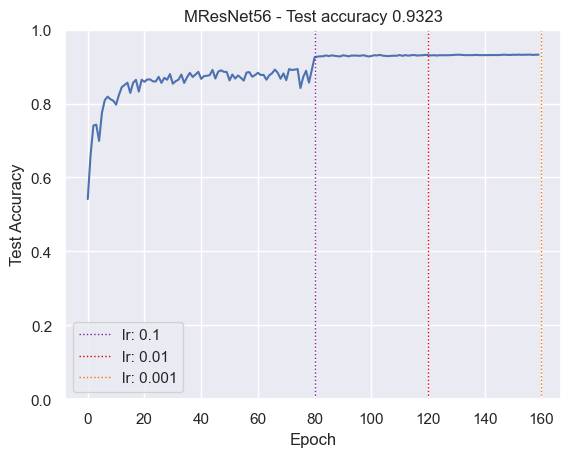

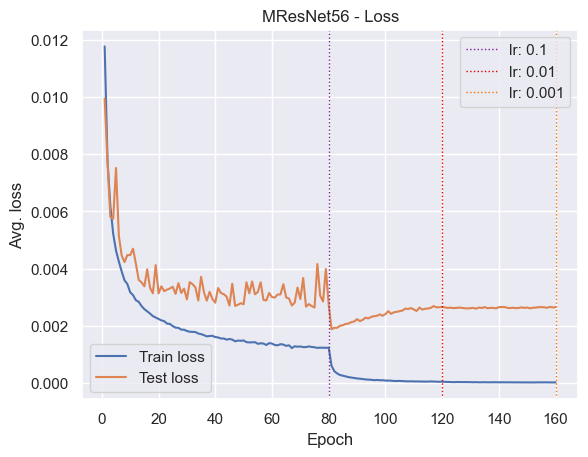

In [25]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet56 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [26]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")

## LMResNet-110

In [27]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck
from MResNet import MResNet

In [29]:
net = MResNet(BasicBlock, [18,18,18], num_classes=10, stochastic_depth=False,)
net.cuda()
model_name = "MResNet110"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,142                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlock: 2-1                   [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [30]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [00:45,  8.51it/s]

Epoch 1 finished, average loss: 0.0125533755
Starting testing


Correct: 4813, total: 10000, accuracy: 0.4812999964, average loss: 0.0112031825


391it [00:45,  8.52it/s]

Epoch 2 finished, average loss: 0.0083297558
Starting testing


Correct: 5639, total: 10000, accuracy: 0.5638999939, average loss: 0.0099459700


391it [00:46,  8.50it/s]

Epoch 3 finished, average loss: 0.0064452732
Starting testing


Correct: 7105, total: 10000, accuracy: 0.7105000019, average loss: 0.0067152257


391it [00:45,  8.52it/s]

Epoch 4 finished, average loss: 0.0054182934
Starting testing


Correct: 7491, total: 10000, accuracy: 0.7490999699, average loss: 0.0056673606


391it [00:45,  8.51it/s]

Epoch 5 finished, average loss: 0.0046903494
Starting testing


Correct: 7683, total: 10000, accuracy: 0.7682999969, average loss: 0.0052566895


391it [00:45,  8.51it/s]

Epoch 6 finished, average loss: 0.0042570407
Starting testing


Correct: 7962, total: 10000, accuracy: 0.7961999774, average loss: 0.0047195407


391it [00:45,  8.52it/s]

Epoch 7 finished, average loss: 0.0039113711
Starting testing


Correct: 8046, total: 10000, accuracy: 0.8046000004, average loss: 0.0044764619


391it [00:45,  8.51it/s]

Epoch 8 finished, average loss: 0.0036286655
Starting testing


Correct: 8237, total: 10000, accuracy: 0.8236999512, average loss: 0.0040251152


391it [00:45,  8.52it/s]

Epoch 9 finished, average loss: 0.0034037927
Starting testing


Correct: 8260, total: 10000, accuracy: 0.8259999752, average loss: 0.0041605183


391it [00:45,  8.50it/s]

Epoch 10 finished, average loss: 0.0032171507
Starting testing


Correct: 8266, total: 10000, accuracy: 0.8265999556, average loss: 0.0039835110


391it [00:45,  8.52it/s]

Epoch 11 finished, average loss: 0.0029943721
Starting testing


Correct: 8354, total: 10000, accuracy: 0.8353999853, average loss: 0.0038744606


391it [00:45,  8.53it/s]

Epoch 12 finished, average loss: 0.0029036529
Starting testing


Correct: 8318, total: 10000, accuracy: 0.8317999840, average loss: 0.0039019104


391it [00:45,  8.51it/s]

Epoch 13 finished, average loss: 0.0027378911
Starting testing


Correct: 8417, total: 10000, accuracy: 0.8416999578, average loss: 0.0037930982


391it [00:45,  8.51it/s]

Epoch 14 finished, average loss: 0.0026476175
Starting testing


Correct: 8511, total: 10000, accuracy: 0.8510999680, average loss: 0.0036463874


391it [00:46,  8.50it/s]

Epoch 15 finished, average loss: 0.0025752228
Starting testing


Correct: 8644, total: 10000, accuracy: 0.8643999696, average loss: 0.0031925856


391it [00:45,  8.52it/s]

Epoch 16 finished, average loss: 0.0024358412
Starting testing


Correct: 8577, total: 10000, accuracy: 0.8576999903, average loss: 0.0034598000


391it [00:46,  8.50it/s]

Epoch 17 finished, average loss: 0.0023790672
Starting testing


Correct: 8554, total: 10000, accuracy: 0.8553999662, average loss: 0.0034020302


391it [00:45,  8.51it/s]

Epoch 18 finished, average loss: 0.0023306915
Starting testing


Correct: 8557, total: 10000, accuracy: 0.8556999564, average loss: 0.0034242263


391it [00:46,  8.50it/s]

Epoch 19 finished, average loss: 0.0022503227
Starting testing


Correct: 8655, total: 10000, accuracy: 0.8654999733, average loss: 0.0032332588


391it [00:46,  8.50it/s]

Epoch 20 finished, average loss: 0.0021154760
Starting testing


Correct: 8675, total: 10000, accuracy: 0.8675000072, average loss: 0.0032877880


391it [00:45,  8.52it/s]

Epoch 21 finished, average loss: 0.0020900471
Starting testing


Correct: 8622, total: 10000, accuracy: 0.8621999621, average loss: 0.0033279592


391it [00:45,  8.52it/s]

Epoch 22 finished, average loss: 0.0020679816
Starting testing


Correct: 8670, total: 10000, accuracy: 0.8669999838, average loss: 0.0030831728


391it [00:45,  8.51it/s]

Epoch 23 finished, average loss: 0.0019983808
Starting testing


Correct: 8422, total: 10000, accuracy: 0.8421999812, average loss: 0.0038683113


391it [00:46,  8.50it/s]

Epoch 24 finished, average loss: 0.0019188556
Starting testing


Correct: 8402, total: 10000, accuracy: 0.8402000070, average loss: 0.0040871510


391it [00:46,  8.48it/s]

Epoch 25 finished, average loss: 0.0019242179
Starting testing


Correct: 8660, total: 10000, accuracy: 0.8659999967, average loss: 0.0032173037


391it [00:45,  8.50it/s]

Epoch 26 finished, average loss: 0.0018525162
Starting testing


Correct: 8600, total: 10000, accuracy: 0.8599999547, average loss: 0.0034323461


391it [00:46,  8.49it/s]

Epoch 27 finished, average loss: 0.0018418641
Starting testing


Correct: 8760, total: 10000, accuracy: 0.8759999871, average loss: 0.0029679201


391it [00:45,  8.51it/s]

Epoch 28 finished, average loss: 0.0018181048
Starting testing


Correct: 8702, total: 10000, accuracy: 0.8701999784, average loss: 0.0031671291


391it [00:45,  8.51it/s]

Epoch 29 finished, average loss: 0.0017719143
Starting testing


Correct: 8691, total: 10000, accuracy: 0.8690999746, average loss: 0.0031879414


391it [00:45,  8.50it/s]

Epoch 30 finished, average loss: 0.0017322329
Starting testing


Correct: 8702, total: 10000, accuracy: 0.8701999784, average loss: 0.0032037766


391it [00:45,  8.51it/s]

Epoch 31 finished, average loss: 0.0017198790
Starting testing


Correct: 8515, total: 10000, accuracy: 0.8514999747, average loss: 0.0035844152


391it [00:45,  8.51it/s]

Epoch 32 finished, average loss: 0.0016871222
Starting testing


Correct: 8732, total: 10000, accuracy: 0.8731999993, average loss: 0.0031187273


391it [00:46,  8.49it/s]

Epoch 33 finished, average loss: 0.0016451765
Starting testing


Correct: 8682, total: 10000, accuracy: 0.8682000041, average loss: 0.0031311781


391it [00:45,  8.51it/s]

Epoch 34 finished, average loss: 0.0016403949
Starting testing


Correct: 8655, total: 10000, accuracy: 0.8654999733, average loss: 0.0032979772


391it [00:45,  8.50it/s]

Epoch 35 finished, average loss: 0.0015600166
Starting testing


Correct: 8799, total: 10000, accuracy: 0.8798999786, average loss: 0.0031302970


391it [00:45,  8.50it/s]

Epoch 36 finished, average loss: 0.0015874151
Starting testing


Correct: 8587, total: 10000, accuracy: 0.8586999774, average loss: 0.0033850646


391it [00:45,  8.50it/s]

Epoch 37 finished, average loss: 0.0015862592
Starting testing


Correct: 8402, total: 10000, accuracy: 0.8402000070, average loss: 0.0041285839


391it [00:45,  8.50it/s]

Epoch 38 finished, average loss: 0.0015455335
Starting testing


Correct: 8781, total: 10000, accuracy: 0.8780999780, average loss: 0.0030245451


391it [00:46,  8.50it/s]

Epoch 39 finished, average loss: 0.0015346149
Starting testing


Correct: 8652, total: 10000, accuracy: 0.8651999831, average loss: 0.0034859944


391it [00:45,  8.52it/s]

Epoch 40 finished, average loss: 0.0014960071
Starting testing


Correct: 8648, total: 10000, accuracy: 0.8647999763, average loss: 0.0032962219


391it [00:46,  8.50it/s]

Epoch 41 finished, average loss: 0.0015118800
Starting testing


Correct: 8653, total: 10000, accuracy: 0.8652999997, average loss: 0.0035145845


391it [00:46,  8.49it/s]

Epoch 42 finished, average loss: 0.0014477891
Starting testing


Correct: 8801, total: 10000, accuracy: 0.8800999522, average loss: 0.0029567393


391it [00:46,  8.50it/s]

Epoch 43 finished, average loss: 0.0014826824
Starting testing


Correct: 8725, total: 10000, accuracy: 0.8725000024, average loss: 0.0032728435


391it [00:45,  8.52it/s]

Epoch 44 finished, average loss: 0.0014294085
Starting testing


Correct: 8752, total: 10000, accuracy: 0.8751999736, average loss: 0.0030581622


391it [00:45,  8.50it/s]

Epoch 45 finished, average loss: 0.0013963308
Starting testing


Correct: 8532, total: 10000, accuracy: 0.8531999588, average loss: 0.0038085064


391it [00:46,  8.48it/s]

Epoch 46 finished, average loss: 0.0014074061
Starting testing


Correct: 8779, total: 10000, accuracy: 0.8779000044, average loss: 0.0030367511


391it [00:45,  8.53it/s]

Epoch 47 finished, average loss: 0.0013691031
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0030132218


391it [00:46,  8.49it/s]

Epoch 48 finished, average loss: 0.0013629074
Starting testing


Correct: 8544, total: 10000, accuracy: 0.8543999791, average loss: 0.0037372952


391it [00:46,  8.49it/s]

Epoch 49 finished, average loss: 0.0013742591
Starting testing


Correct: 8686, total: 10000, accuracy: 0.8685999513, average loss: 0.0033338619


391it [00:46,  8.49it/s]

Epoch 50 finished, average loss: 0.0013584700
Starting testing


Correct: 8945, total: 10000, accuracy: 0.8944999576, average loss: 0.0027289397


391it [00:45,  8.51it/s]

Epoch 51 finished, average loss: 0.0012970668
Starting testing


Correct: 8638, total: 10000, accuracy: 0.8637999892, average loss: 0.0033059519


391it [00:45,  8.50it/s]

Epoch 52 finished, average loss: 0.0013137982
Starting testing


Correct: 8918, total: 10000, accuracy: 0.8917999864, average loss: 0.0027545436


391it [00:45,  8.51it/s]

Epoch 53 finished, average loss: 0.0012761914
Starting testing


Correct: 8910, total: 10000, accuracy: 0.8909999728, average loss: 0.0026571061


391it [00:46,  8.50it/s]

Epoch 54 finished, average loss: 0.0012872180
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0027383590


391it [00:45,  8.50it/s]

Epoch 55 finished, average loss: 0.0012864657
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0034157077


391it [00:45,  8.51it/s]

Epoch 56 finished, average loss: 0.0012589409
Starting testing


Correct: 8738, total: 10000, accuracy: 0.8737999797, average loss: 0.0032659942


391it [00:46,  8.50it/s]

Epoch 57 finished, average loss: 0.0012522784
Starting testing


Correct: 8901, total: 10000, accuracy: 0.8901000023, average loss: 0.0028400846


391it [00:45,  8.50it/s]

Epoch 58 finished, average loss: 0.0012406342
Starting testing


Correct: 8855, total: 10000, accuracy: 0.8854999542, average loss: 0.0029473829


391it [00:45,  8.50it/s]

Epoch 59 finished, average loss: 0.0012579837
Starting testing


Correct: 8679, total: 10000, accuracy: 0.8678999543, average loss: 0.0034219865


391it [00:45,  8.51it/s]

Epoch 60 finished, average loss: 0.0012469527
Starting testing


Correct: 8876, total: 10000, accuracy: 0.8876000047, average loss: 0.0027376886


391it [00:46,  8.47it/s]

Epoch 61 finished, average loss: 0.0012384050
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0029988259


391it [00:45,  8.51it/s]

Epoch 62 finished, average loss: 0.0012035153
Starting testing


Correct: 8900, total: 10000, accuracy: 0.8899999857, average loss: 0.0028738617


391it [00:45,  8.51it/s]

Epoch 63 finished, average loss: 0.0012127001
Starting testing


Correct: 8803, total: 10000, accuracy: 0.8802999854, average loss: 0.0030888673


391it [00:46,  8.48it/s]

Epoch 64 finished, average loss: 0.0011935040
Starting testing


Correct: 8808, total: 10000, accuracy: 0.8807999492, average loss: 0.0034274982


391it [00:46,  8.49it/s]

Epoch 65 finished, average loss: 0.0011827577
Starting testing


Correct: 8862, total: 10000, accuracy: 0.8861999512, average loss: 0.0028747665


391it [00:45,  8.51it/s]

Epoch 66 finished, average loss: 0.0011555996
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0029186401


391it [00:46,  8.49it/s]

Epoch 67 finished, average loss: 0.0011671702
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0030478548


391it [00:45,  8.51it/s]

Epoch 68 finished, average loss: 0.0011542902
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0030220311


391it [00:46,  8.50it/s]

Epoch 69 finished, average loss: 0.0011630960
Starting testing


Correct: 8717, total: 10000, accuracy: 0.8716999888, average loss: 0.0033980462


391it [00:46,  8.50it/s]

Epoch 70 finished, average loss: 0.0011270802
Starting testing


Correct: 8813, total: 10000, accuracy: 0.8812999725, average loss: 0.0029922736


391it [00:45,  8.52it/s]

Epoch 71 finished, average loss: 0.0011374023
Starting testing


Correct: 8844, total: 10000, accuracy: 0.8843999505, average loss: 0.0030770724


391it [00:46,  8.48it/s]

Epoch 72 finished, average loss: 0.0011492937
Starting testing


Correct: 8767, total: 10000, accuracy: 0.8766999841, average loss: 0.0029388464


391it [00:45,  8.51it/s]

Epoch 73 finished, average loss: 0.0011226166
Starting testing


Correct: 8896, total: 10000, accuracy: 0.8895999789, average loss: 0.0028852160


391it [00:45,  8.50it/s]

Epoch 74 finished, average loss: 0.0011596366
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0029273303


391it [00:45,  8.50it/s]

Epoch 75 finished, average loss: 0.0011245504
Starting testing


Correct: 8764, total: 10000, accuracy: 0.8763999939, average loss: 0.0032862850


391it [00:45,  8.51it/s]

Epoch 76 finished, average loss: 0.0010998717
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0032597450


391it [00:46,  8.49it/s]

Epoch 77 finished, average loss: 0.0010954870
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0028798173


391it [00:46,  8.50it/s]

Epoch 78 finished, average loss: 0.0011496725
Starting testing


Correct: 8846, total: 10000, accuracy: 0.8845999837, average loss: 0.0029603499


391it [00:45,  8.51it/s]

Epoch 79 finished, average loss: 0.0010651412
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0028398576


391it [00:46,  8.49it/s]

Epoch 80 finished, average loss: 0.0010868001
Starting testing


Correct: 8771, total: 10000, accuracy: 0.8770999908, average loss: 0.0031384136


391it [00:46,  8.50it/s]

Epoch 81 finished, average loss: 0.0005202152
Starting testing


Correct: 9267, total: 10000, accuracy: 0.9266999960, average loss: 0.0018302453


391it [00:46,  8.50it/s]

Epoch 82 finished, average loss: 0.0003197953
Starting testing


Correct: 9280, total: 10000, accuracy: 0.9279999733, average loss: 0.0018098658


391it [00:46,  8.48it/s]

Epoch 83 finished, average loss: 0.0002452417
Starting testing


Correct: 9284, total: 10000, accuracy: 0.9283999801, average loss: 0.0018575102


391it [00:45,  8.51it/s]

Epoch 84 finished, average loss: 0.0002193750
Starting testing


Correct: 9298, total: 10000, accuracy: 0.9297999740, average loss: 0.0018486911


391it [00:46,  8.49it/s]

Epoch 85 finished, average loss: 0.0001700412
Starting testing


Correct: 9309, total: 10000, accuracy: 0.9308999777, average loss: 0.0018791572


391it [00:45,  8.50it/s]

Epoch 86 finished, average loss: 0.0001510760
Starting testing


Correct: 9293, total: 10000, accuracy: 0.9292999506, average loss: 0.0019115383


391it [00:46,  8.49it/s]

Epoch 87 finished, average loss: 0.0001394634
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0019297505


391it [00:45,  8.51it/s]

Epoch 88 finished, average loss: 0.0001239686
Starting testing


Correct: 9305, total: 10000, accuracy: 0.9304999709, average loss: 0.0020281719


391it [00:46,  8.48it/s]

Epoch 89 finished, average loss: 0.0001190331
Starting testing


Correct: 9309, total: 10000, accuracy: 0.9308999777, average loss: 0.0019871806


391it [00:45,  8.50it/s]

Epoch 90 finished, average loss: 0.0001022482
Starting testing


Correct: 9328, total: 10000, accuracy: 0.9327999949, average loss: 0.0020521324


391it [00:46,  8.47it/s]

Epoch 91 finished, average loss: 0.0000947580
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0020367181


391it [00:45,  8.51it/s]

Epoch 92 finished, average loss: 0.0000843461
Starting testing


Correct: 9329, total: 10000, accuracy: 0.9328999519, average loss: 0.0020460840


391it [00:45,  8.50it/s]

Epoch 93 finished, average loss: 0.0000752013
Starting testing


Correct: 9316, total: 10000, accuracy: 0.9315999746, average loss: 0.0020914195


391it [00:46,  8.49it/s]

Epoch 94 finished, average loss: 0.0000720559
Starting testing


Correct: 9325, total: 10000, accuracy: 0.9325000048, average loss: 0.0021407380


391it [00:45,  8.51it/s]

Epoch 95 finished, average loss: 0.0000704017
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0021639274


391it [00:45,  8.50it/s]

Epoch 96 finished, average loss: 0.0000636184
Starting testing


Correct: 9328, total: 10000, accuracy: 0.9327999949, average loss: 0.0021439253


391it [00:45,  8.51it/s]

Epoch 97 finished, average loss: 0.0000596487
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0021880802


391it [00:46,  8.47it/s]

Epoch 98 finished, average loss: 0.0000541190
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0022346744


391it [00:46,  8.48it/s]

Epoch 99 finished, average loss: 0.0000571515
Starting testing


Correct: 9331, total: 10000, accuracy: 0.9330999851, average loss: 0.0022267713


391it [00:45,  8.50it/s]

Epoch 100 finished, average loss: 0.0000578133
Starting testing


Correct: 9337, total: 10000, accuracy: 0.9336999655, average loss: 0.0021813271


391it [00:45,  8.51it/s]

Epoch 101 finished, average loss: 0.0000494082
Starting testing


Correct: 9328, total: 10000, accuracy: 0.9327999949, average loss: 0.0022553894


391it [00:46,  8.36it/s]

Epoch 102 finished, average loss: 0.0000453548
Starting testing


Correct: 9329, total: 10000, accuracy: 0.9328999519, average loss: 0.0022448306


391it [00:51,  7.53it/s]

Epoch 103 finished, average loss: 0.0000511643
Starting testing


Correct: 9350, total: 10000, accuracy: 0.9350000024, average loss: 0.0022145396


391it [00:52,  7.42it/s]

Epoch 104 finished, average loss: 0.0000443679
Starting testing


Correct: 9341, total: 10000, accuracy: 0.9340999722, average loss: 0.0022449057


391it [00:51,  7.52it/s]

Epoch 105 finished, average loss: 0.0000431769
Starting testing


Correct: 9348, total: 10000, accuracy: 0.9347999692, average loss: 0.0022692947


391it [00:51,  7.53it/s]

Epoch 106 finished, average loss: 0.0000483368
Starting testing


Correct: 9311, total: 10000, accuracy: 0.9310999513, average loss: 0.0023170092


391it [00:53,  7.36it/s]

Epoch 107 finished, average loss: 0.0000468753
Starting testing


Correct: 9339, total: 10000, accuracy: 0.9338999987, average loss: 0.0022853248


391it [00:53,  7.37it/s]

Epoch 108 finished, average loss: 0.0000430632
Starting testing


Correct: 9351, total: 10000, accuracy: 0.9350999594, average loss: 0.0022840680


391it [00:53,  7.33it/s]

Epoch 109 finished, average loss: 0.0000371467
Starting testing


Correct: 9331, total: 10000, accuracy: 0.9330999851, average loss: 0.0023465534


391it [00:53,  7.33it/s]

Epoch 110 finished, average loss: 0.0000317564
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0023952292


391it [00:53,  7.35it/s]

Epoch 111 finished, average loss: 0.0000310119
Starting testing


Correct: 9337, total: 10000, accuracy: 0.9336999655, average loss: 0.0023278266


391it [00:53,  7.32it/s]

Epoch 112 finished, average loss: 0.0000366676
Starting testing


Correct: 9327, total: 10000, accuracy: 0.9326999784, average loss: 0.0023799312


391it [00:53,  7.34it/s]

Epoch 113 finished, average loss: 0.0000381834
Starting testing


Correct: 9324, total: 10000, accuracy: 0.9323999882, average loss: 0.0024426390


391it [00:53,  7.37it/s]

Epoch 114 finished, average loss: 0.0000323998
Starting testing


Correct: 9325, total: 10000, accuracy: 0.9325000048, average loss: 0.0023867572


391it [00:53,  7.31it/s]

Epoch 115 finished, average loss: 0.0000307625
Starting testing


Correct: 9331, total: 10000, accuracy: 0.9330999851, average loss: 0.0024149921


391it [00:53,  7.36it/s]

Epoch 116 finished, average loss: 0.0000270227
Starting testing


Correct: 9317, total: 10000, accuracy: 0.9316999912, average loss: 0.0024340482


391it [00:53,  7.37it/s]

Epoch 117 finished, average loss: 0.0000305510
Starting testing


Correct: 9322, total: 10000, accuracy: 0.9321999550, average loss: 0.0024437388


391it [00:53,  7.31it/s]

Epoch 118 finished, average loss: 0.0000263314
Starting testing


Correct: 9329, total: 10000, accuracy: 0.9328999519, average loss: 0.0023858169


391it [00:53,  7.34it/s]

Epoch 119 finished, average loss: 0.0000245367
Starting testing


Correct: 9333, total: 10000, accuracy: 0.9332999587, average loss: 0.0023998903


391it [00:53,  7.34it/s]

Epoch 120 finished, average loss: 0.0000299019
Starting testing


Correct: 9341, total: 10000, accuracy: 0.9340999722, average loss: 0.0024005779


391it [00:53,  7.35it/s]

Epoch 121 finished, average loss: 0.0000264089
Starting testing


Correct: 9330, total: 10000, accuracy: 0.9329999685, average loss: 0.0023974130


391it [00:53,  7.32it/s]

Epoch 122 finished, average loss: 0.0000250078
Starting testing


Correct: 9321, total: 10000, accuracy: 0.9320999980, average loss: 0.0024045156


391it [00:53,  7.34it/s]

Epoch 123 finished, average loss: 0.0000231951
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0023752098


391it [00:52,  7.39it/s]

Epoch 124 finished, average loss: 0.0000245566
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0023569569


391it [00:53,  7.34it/s]

Epoch 125 finished, average loss: 0.0000221668
Starting testing


Correct: 9329, total: 10000, accuracy: 0.9328999519, average loss: 0.0023840834


391it [00:53,  7.35it/s]

Epoch 126 finished, average loss: 0.0000191710
Starting testing


Correct: 9331, total: 10000, accuracy: 0.9330999851, average loss: 0.0023758705


391it [00:53,  7.31it/s]

Epoch 127 finished, average loss: 0.0000195794
Starting testing


Correct: 9345, total: 10000, accuracy: 0.9344999790, average loss: 0.0023893563


391it [00:53,  7.31it/s]

Epoch 128 finished, average loss: 0.0000201230
Starting testing


Correct: 9339, total: 10000, accuracy: 0.9338999987, average loss: 0.0023602146


391it [00:53,  7.28it/s]

Epoch 129 finished, average loss: 0.0000191970
Starting testing


Correct: 9331, total: 10000, accuracy: 0.9330999851, average loss: 0.0023776603


391it [00:53,  7.31it/s]

Epoch 130 finished, average loss: 0.0000172675
Starting testing


Correct: 9330, total: 10000, accuracy: 0.9329999685, average loss: 0.0023850587


391it [00:53,  7.35it/s]

Epoch 131 finished, average loss: 0.0000173420
Starting testing


Correct: 9326, total: 10000, accuracy: 0.9325999618, average loss: 0.0023825416


391it [00:53,  7.32it/s]

Epoch 132 finished, average loss: 0.0000195154
Starting testing


Correct: 9336, total: 10000, accuracy: 0.9335999489, average loss: 0.0023870701


391it [00:53,  7.36it/s]

Epoch 133 finished, average loss: 0.0000181152
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0023760190


391it [00:53,  7.32it/s]

Epoch 134 finished, average loss: 0.0000192225
Starting testing


Correct: 9338, total: 10000, accuracy: 0.9337999821, average loss: 0.0023815532


391it [00:53,  7.37it/s]

Epoch 135 finished, average loss: 0.0000170876
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0023774208


391it [00:53,  7.35it/s]

Epoch 136 finished, average loss: 0.0000156372
Starting testing


Correct: 9330, total: 10000, accuracy: 0.9329999685, average loss: 0.0023832650


391it [00:53,  7.37it/s]

Epoch 137 finished, average loss: 0.0000165535
Starting testing


Correct: 9337, total: 10000, accuracy: 0.9336999655, average loss: 0.0023791522


391it [00:53,  7.37it/s]

Epoch 138 finished, average loss: 0.0000153062
Starting testing


Correct: 9335, total: 10000, accuracy: 0.9334999919, average loss: 0.0023689645


391it [00:53,  7.37it/s]

Epoch 139 finished, average loss: 0.0000156699
Starting testing


Correct: 9332, total: 10000, accuracy: 0.9332000017, average loss: 0.0024070150


391it [00:53,  7.37it/s]

Epoch 140 finished, average loss: 0.0000175837
Starting testing


Correct: 9326, total: 10000, accuracy: 0.9325999618, average loss: 0.0023878056


391it [00:53,  7.38it/s]

Epoch 141 finished, average loss: 0.0000169656
Starting testing


Correct: 9336, total: 10000, accuracy: 0.9335999489, average loss: 0.0023858170


391it [00:53,  7.34it/s]

Epoch 142 finished, average loss: 0.0000164333
Starting testing


Correct: 9335, total: 10000, accuracy: 0.9334999919, average loss: 0.0023847568


391it [00:53,  7.30it/s]

Epoch 143 finished, average loss: 0.0000152903
Starting testing


Correct: 9336, total: 10000, accuracy: 0.9335999489, average loss: 0.0023901888


391it [00:53,  7.34it/s]

Epoch 144 finished, average loss: 0.0000151397
Starting testing


Correct: 9320, total: 10000, accuracy: 0.9319999814, average loss: 0.0023931685


391it [00:53,  7.36it/s]

Epoch 145 finished, average loss: 0.0000172884
Starting testing


Correct: 9318, total: 10000, accuracy: 0.9317999482, average loss: 0.0024190288


391it [00:53,  7.35it/s]

Epoch 146 finished, average loss: 0.0000164663
Starting testing


Correct: 9334, total: 10000, accuracy: 0.9333999753, average loss: 0.0023842709


391it [00:53,  7.36it/s]

Epoch 147 finished, average loss: 0.0000153676
Starting testing


Correct: 9349, total: 10000, accuracy: 0.9348999858, average loss: 0.0024021195


391it [00:53,  7.35it/s]

Epoch 148 finished, average loss: 0.0000160554
Starting testing


Correct: 9336, total: 10000, accuracy: 0.9335999489, average loss: 0.0023855917


391it [00:53,  7.33it/s]

Epoch 149 finished, average loss: 0.0000170624
Starting testing


Correct: 9339, total: 10000, accuracy: 0.9338999987, average loss: 0.0024099994


391it [00:53,  7.34it/s]

Epoch 150 finished, average loss: 0.0000158649
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0023924895


391it [00:53,  7.33it/s]

Epoch 151 finished, average loss: 0.0000180328
Starting testing


Correct: 9343, total: 10000, accuracy: 0.9343000054, average loss: 0.0023926793


391it [00:53,  7.32it/s]

Epoch 152 finished, average loss: 0.0000165821
Starting testing


Correct: 9347, total: 10000, accuracy: 0.9346999526, average loss: 0.0023991369


391it [00:53,  7.36it/s]

Epoch 153 finished, average loss: 0.0000165415
Starting testing


Correct: 9340, total: 10000, accuracy: 0.9339999557, average loss: 0.0023881329


391it [00:53,  7.32it/s]

Epoch 154 finished, average loss: 0.0000154297
Starting testing


Correct: 9354, total: 10000, accuracy: 0.9353999496, average loss: 0.0023830803


391it [00:53,  7.34it/s]

Epoch 155 finished, average loss: 0.0000126451
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0023850711


391it [00:53,  7.34it/s]

Epoch 156 finished, average loss: 0.0000139183
Starting testing


Correct: 9341, total: 10000, accuracy: 0.9340999722, average loss: 0.0024316654


391it [00:53,  7.33it/s]

Epoch 157 finished, average loss: 0.0000152926
Starting testing


Correct: 9355, total: 10000, accuracy: 0.9354999661, average loss: 0.0024216606


391it [00:53,  7.35it/s]

Epoch 158 finished, average loss: 0.0000154016
Starting testing


Correct: 9344, total: 10000, accuracy: 0.9343999624, average loss: 0.0024029568


391it [00:49,  7.91it/s]

Epoch 159 finished, average loss: 0.0000146190
Starting testing


Correct: 9337, total: 10000, accuracy: 0.9336999655, average loss: 0.0024277057


391it [00:47,  8.21it/s]

Epoch 160 finished, average loss: 0.0000151357
Starting testing


Correct: 9347, total: 10000, accuracy: 0.9346999526, average loss: 0.0024253682
CPU times: user 1h 34min 37s, sys: 42min 7s, total: 2h 16min 44s
Wall time: 2h 18min 15s


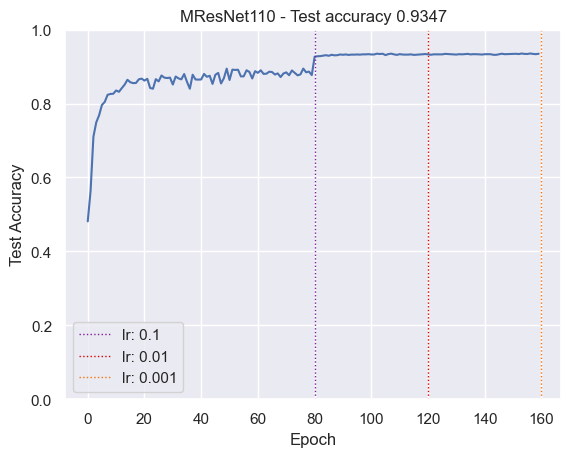

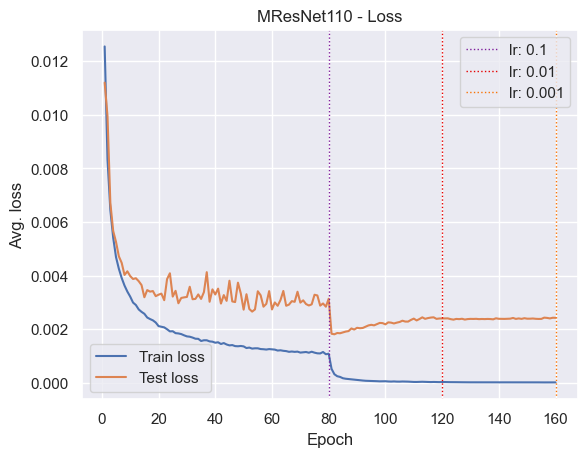

In [31]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet110 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [32]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n")